In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:36715")
client

<Client: 'tcp://127.0.0.1:36715' processes=8 threads=32, memory=125.85 GiB>

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import os.path as op
import os
import gsw
import xrft
import xwavelet
from scipy.interpolate import griddata
from scipy.stats import bootstrap
from xgcm.grid import Grid
import MITgcmutils as mitutils
from xmitgcm import open_mdsdataset
# from fastjmd95 import rho as densjmd95
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/tank/chaocean/qjamet/RUNS/ORAR/reruns2/'
gdir = '/tank/chaocean/grid_chaO/gridMIT_update1/'
savedir = '/tank/topog/tuchida/Wavelet-spectrum/'
spec = '/tank/spectre/tuchida/NA-wavelets/'

In [4]:
grav = 9.81
nensembs = 5
Kh = 20.
K4 = 1e10
Kr = 1e-5
thetaMax = 1e20
rhoConst = 9.998e2
# Cp = 3.994e3
Cp = 3989.244953
# years = np.arange(2008,2013,dtype=int)
dnf = 2160
nfile = 73

ySstart = -19.8
yNstart = 10
yend = 50

tchunk = 1
xchunk = 200
ychunk = 200

In [5]:
xs = [294,314,319
     ]
ys = [35,35,25
     ]
reg = 0
# sreg = ['A','B','C','D','E','F']

xo = 50e3

nmembs = np.arange(100,148)
xchunk = 200
ychunk = 200

In [8]:
years = np.arange(1967,1968,dtype=int)
ntimes = np.arange(1419120,1574640+dnf,dnf).reshape(len(years),nfile)
dd = 60  # 

print(ntimes[0,:dd][::3])

[1419120 1425600 1432080 1438560 1445040 1451520 1458000 1464480 1470960
 1477440 1483920 1490400 1496880 1503360 1509840 1516320 1522800 1529280
 1535760 1542240]


In [7]:
reg = 0

for itime in ntimes[0,:dd][::3]:
    
    if itime == ntimes[0,0]:
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Adv/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds0 = xr.open_dataset(op.join(spec,fname))
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/ShProd/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds1 = xr.open_dataset(op.join(spec,fname))
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Sk/Theta/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds2 = xr.open_dataset(op.join(spec,fname))
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Sk/Salt/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds3 = xr.open_dataset(op.join(spec,fname))
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Hk/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds4 = xr.open_dataset(op.join(spec,fname))
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/HorAdv/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds5 = xr.open_dataset(op.join(spec,fname))
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/wb/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds6 = xr.open_dataset(op.join(spec,fname))
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_Adv/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds7 = xr.open_dataset(op.join(spec,fname))
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_horiAdv/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds8 = xr.open_dataset(op.join(spec,fname))
    else:
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Adv/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds0 = xr.concat([ds0,xr.open_dataset(op.join(spec,fname))
                        ], 'time')
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/ShProd/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds1 = xr.concat([ds1,xr.open_dataset(op.join(spec,fname))
                        ], 'time')
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Sk/Theta/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds2 = xr.concat([ds2,xr.open_dataset(op.join(spec,fname))
                        ], 'time')
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Sk/Salt/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds3 = xr.concat([ds3,xr.open_dataset(op.join(spec,fname))
                        ], 'time')
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Hk/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds4 = xr.concat([ds4,xr.open_dataset(op.join(spec,fname))
                        ], 'time')
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/HorAdv/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds5 = xr.concat([ds5,xr.open_dataset(op.join(spec,fname))
                        ], 'time')
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/wb/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds6 = xr.concat([ds6,xr.open_dataset(op.join(spec,fname))
                        ], 'time')
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_Adv/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds7 = xr.concat([ds7,xr.open_dataset(op.join(spec,fname))
                        ], 'time')
        fname = (
                 'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_horiAdv/Lat%03d_Lon%03d.zarr' 
                 % (itime,ys[reg],xs[reg])
        )
        ds8 = xr.concat([ds8,xr.open_dataset(op.join(spec,fname))
                        ], 'time')


ds8

/tank/spectre/tuchida/envs/spec/lib/python3.9/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/tank/spectre/tuchida/envs/spec/lib/python3.9/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.Dataset>
Dimensions:  (time: 20, nmemb: 48, angle: 18, scale: 48)
Coordinates:
  * angle    (angle) float64 0.0 0.1745 0.3491 0.5236 ... 2.618 2.793 2.967
  * nmemb    (nmemb) int64 100 101 102 103 104 105 ... 142 143 144 145 146 147
  * scale    (scale) float64 4.687e+05 4.572e+05 ... 2.016e+04 1.902e+04
Dimensions without coordinates: time
Data variables:
    U        (time, nmemb, angle, scale) float64 0.002326 0.002409 ... 2.309e-09
    V        (time, nmemb, angle, scale) float64 -0.02526 -0.02799 ... 2.692e-09
Attributes:
    Lat:      35.208370208740234
    Lon:      294.4870300292969

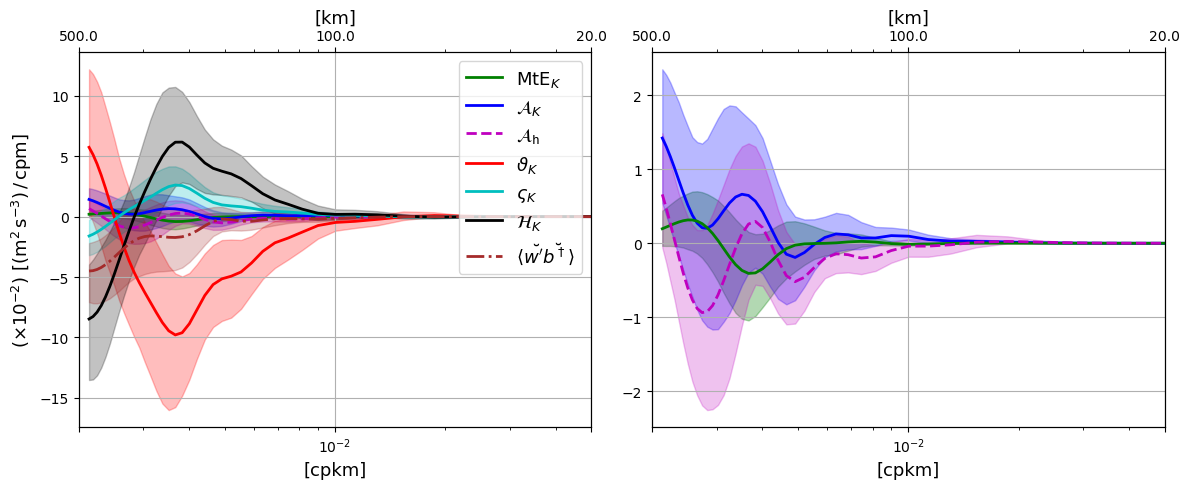

In [13]:
SP = (ds1.U + ds1.V)
SPk = SP.sum('angle').isel(time=0).mean(['nmemb']).compute()
    
    # ds5 = xr.open_dataset(op.join(spec,'Points/%s/%010d/isoDiags_u_forcing.zarr' 
    #                               % (sreg[reg],iiter))
    #                      )
    # ds6 = xr.open_dataset(op.join(spec,'Points/%s/%010d/isoDiags_v_forcing.zarr' 
    #                               % (sreg[reg],iiter))
    #                      )
    # if nz == 0:
    #     datas = ((ds5.iso_uF + ds6.iso_vF).isel(Z=nz).sum('angle')
    #              * np.diff(ds0.angle)[0]*2*1e2,)  # samples must be in a sequence
    #     rng = np.random.default_rng()
    #     Fres = bootstrap(datas, np.mean, confidence_level=0.95,
    #                      random_state=rng)
    #     Fk = (ds5.iso_uF + ds6.iso_vF).mean(['nmemb']).isel(Z=nz).sum('angle').compute()

datas = (SP.sum('angle').isel(time=0)
         * np.diff(ds1.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
SPres = bootstrap(datas, np.mean, confidence_level=0.95,
                      random_state=rng)
    # datas = ((ds0.iso_uA + ds1.iso_vA - MtE).isel(Z=nz).sum('angle')
    #          * np.diff(ds0.angle)[0]*2*1e2,)  # samples must be in a sequence
del datas
datas = (((ds0.U + ds0.V
        # ds0.iso_uA + ds1.iso_vA
          ) - SP).sum('angle').isel(time=0)
         * np.diff(ds0.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Ares = bootstrap(datas, np.mean, confidence_level=0.95,
                     random_state=rng)
del datas 
Ak = ((ds0.U + ds0.V
           # ds0.iso_uA + ds1.iso_vA
          )
          # - MtE
      - SP
     ).sum('angle').isel(time=0).mean(['nmemb']).compute()
    # MtEk = MtE.mean(['nmemb']).sum('angle').compute()
#######################
datas = ((ds5.U + ds5.V
         ).sum('angle').isel(time=0)
         * np.diff(ds5.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
HAres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas   
HAk = (ds5.U + ds5.V
      ).sum('angle').isel(time=0).mean(['nmemb']).compute()
#######################
datas = ((ds2.U + ds2.V + ds2.W
         ).sum('angle').isel(time=0)
         * np.diff(ds2.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Tres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Tk = (ds2.U + ds2.V + ds2.W
     ).sum('angle').isel(time=0).mean(['nmemb']).compute()
#######################
datas = ((ds3.U + ds3.V + ds3.W
         ).sum('angle').isel(time=0)
         * np.diff(ds3.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Sres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Sk = (ds3.U + ds3.V + ds3.W
     ).sum('angle').isel(time=0).mean(['nmemb']).compute()
#######################
datas = (-(ds4.U + ds4.V + ds4.W
         ).sum('angle').isel(time=0)
         * np.diff(ds4.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Hres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Hk = -(ds4.U + ds4.V + ds4.W
     ).sum('angle').isel(time=0).mean(['nmemb']).compute()
#######################
datas = (ds6.W.sum('angle').isel(time=0)
         * np.diff(ds6.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Wres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Wk = ds6.W.sum('angle').isel(time=0).mean(['nmemb']).compute()
    
# res = Tk/86400. - (Pk + (dtau.iso_uA + dtav.iso_vA
#                              # ds0.iso_uA + ds1.iso_vA
#                             ).isel(Z=nz).mean(['nmemb']).sum('angle').compute() 
#                        + Dk + ABk
#                       )
#     if nz == 0:
#         res -= Fk
            
fig, (ax1,ax3) = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
    # fig, ax = plt.subplots(figsize=(7,6))
fig.set_tight_layout(True)
ax2 = ax1.twiny()
ax4 = ax3.twiny()
    
ax1.fill_between((ds1.scale)**-1*1e3, 
                SPres.confidence_interval.high, 
                SPres.confidence_interval.low, 
                alpha=.32, color='g')
ax1.fill_between((ds0.scale)**-1*1e3, 
                Ares.confidence_interval.low, 
                Ares.confidence_interval.high, 
                alpha=.28, color='b')
ax1.fill_between((ds5.scale)**-1*1e3, 
                HAres.confidence_interval.low, 
                HAres.confidence_interval.high, 
                alpha=.28, color='m')
ax1.fill_between((ds2.scale)**-1*1e3, 
                Tres.confidence_interval.low, 
                Tres.confidence_interval.high, 
                alpha=.26, color='r')
ax1.fill_between((ds3.scale)**-1*1e3, 
                Sres.confidence_interval.low, 
                Sres.confidence_interval.high, 
                alpha=.26, color='c')
ax1.fill_between((ds4.scale)**-1*1e3, 
                Hres.confidence_interval.low, 
                Hres.confidence_interval.high, 
                alpha=.24, color='k')
ax1.fill_between((ds4.scale)**-1*1e3, 
                Wres.confidence_interval.low, 
                Wres.confidence_interval.high, 
                alpha=.24, color='brown')

ax3.fill_between((ds1.scale)**-1*1e3, 
                SPres.confidence_interval.high, 
                SPres.confidence_interval.low, 
                alpha=.3, color='g')
ax3.fill_between((ds0.scale)**-1*1e3, 
                Ares.confidence_interval.low, 
                Ares.confidence_interval.high, 
                alpha=.28, color='b')
ax3.fill_between((ds5.scale)**-1*1e3, 
                HAres.confidence_interval.low, 
                HAres.confidence_interval.high, 
                alpha=.24, color='m')
# if nz == 0:
#     ax.fill_between((ds0.scale)**-1*1e3, Fres.confidence_interval.low, 
#                         Fres.confidence_interval.high, 
#                         alpha=.26, color='c')
# ax.fill_between((ds0.scale)**-1*1e3, ABres.confidence_interval.low, 
#                     ABres.confidence_interval.high, 
#                     alpha=.24, color='orange')
    
ax1.plot((ds1.scale)**-1*1e3, 
        SPk*np.diff(ds1.angle)[0]*2*1e2,
        'g', lw=2, label=r"MtE$_K$")
ax1.plot((ds0.scale)**-1*1e3, 
        Ak*np.diff(ds0.angle)[0]*2*1e2,
        'b', lw=2, label=r"$\mathcal{A}_K$")
ax1.plot((ds5.scale)**-1*1e3, 
        HAk*np.diff(ds5.angle)[0]*2*1e2,
        'm--', lw=2, label=r"$\mathcal{A}_{\tt h}$")
ax1.plot((ds2.scale)**-1*1e3, 
        Tk*np.diff(ds2.angle)[0]*2*1e2,
        'r', lw=2, label=r"$\vartheta_K$")
ax1.plot((ds3.scale)**-1*1e3, 
        Sk*np.diff(ds3.angle)[0]*2*1e2,
        c='c', lw=2, label=r"$\varsigma_K$")
ax1.plot((ds4.scale)**-1*1e3, 
        Hk*np.diff(ds4.angle)[0]*2*1e2,
        c='k', lw=2, label=r"$\mathcal{H}_K$")
ax1.plot((ds6.scale)**-1*1e3, 
        Wk*np.diff(ds6.angle)[0]*2*1e2,
        color='brown', ls='-.', lw=2, label=r"$\langle\breve{w'}\breve{b^\dagger}\rangle$")

ax3.plot((ds0.scale)**-1*1e3, 
        Ak*np.diff(ds0.angle)[0]*2*1e2,
        'b', lw=2, label=r"$\mathcal{A}_K$")
ax3.plot((ds1.scale)**-1*1e3, 
        SPk*np.diff(ds1.angle)[0]*2*1e2,
        'g', lw=2, label=r"MtE$_K$")
ax3.plot((ds5.scale)**-1*1e3, 
        HAk*np.diff(ds5.angle)[0]*2*1e2,
        'm--', lw=2, label=r"$\mathcal{A}_{\tt h}$")
# if nz == 0:
#     ax.plot((ds0.scale)**-1*1e3, Fk*np.diff(ds0.angle)[0]*2*1e2,
#                 'c', lw=3, label=r"$\mathcal{F}_K$")
# ax.plot((ds0.scale)**-1*1e3, ABk*np.diff(ds0.angle)[0]*2*1e2,
#             c='orange', lw=3, label=r"$AB_K$")
# ax.plot((ds0.scale)**-1*1e3, res*np.diff(ds0.angle)[0]*2*1e2, 
#             c='grey', ls='--', lw=2, label=r"Res.")

ax1.set_xscale('log')
#             ax.set_yscale('log')
ax2.set_xscale('log')
#             ax2.set_yscale('log')
ax1.set_xlim([2e-3,5e-2])
ax1.set_xticks([2e-3,1e-2,5e-2])
ax2.set_xlim([2e-3,5e-2])
ax2.set_xticks([2e-3,1e-2,5e-2])
ax2.set_xticklabels([5e2,1e2,2e1])
# Meta = np.abs(Pk.isel(Z=0)).max(skipna=True).values*1e3
# ax.set_ylim([-Meta*.7, Meta*.7])
ax1.set_xlabel(r"[cpkm]", fontsize=13)
ax2.set_xlabel(r"[km]", fontsize=13)
ax1.set_ylabel(r"($\times 10^{-2}$) [(m$^2\,$s$^{-3})\,/\,$cpm]", fontsize=13)
ax3.set_xscale('log')
#             ax.set_yscale('log')
ax4.set_xscale('log')
#             ax2.set_yscale('log')
ax3.set_xlim([2e-3,5e-2])
ax3.set_xticks([2e-3,1e-2,5e-2])
ax4.set_xlim([2e-3,5e-2])
ax4.set_xticks([2e-3,1e-2,5e-2])
ax4.set_xticklabels([5e2,1e2,2e1])
# Meta = np.abs(Pk.isel(Z=0)).max(skipna=True).values*1e3
# ax.set_ylim([-Meta*.7, Meta*.7])
ax3.set_xlabel(r"[cpkm]", fontsize=13)
ax4.set_xlabel(r"[km]", fontsize=13)
ax1.grid(True)
ax3.grid(True)
# if reg % 5 == 0:
ax1.legend(loc='upper right', fontsize=13)
plt.savefig(op.join(spec,'Figs/SpecKEtrans_Lat%03d_Lon%03d_Z452_1967-01-01.pdf' 
                        % (ys[reg],xs[reg])))
plt.show()

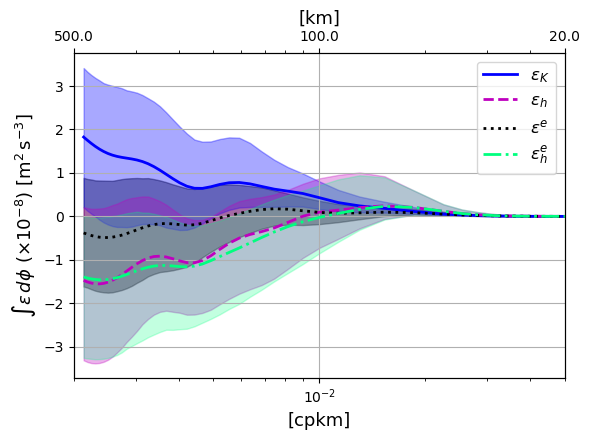

In [37]:
dks = xr.DataArray(np.abs(np.diff(ds0.scale**-1)).data, dims='scale',
                       coords={'scale':.5*(ds0.scale[1:].data 
                                           + ds0.scale[:-1].data)}
                      ).interp(scale=ds0.scale, 
                               kwargs={"fill_value": "extrapolate"})
    # MtE = (ds4.iso_uA + ds4.iso_vA)
SP = (ds1.U + ds1.V)
Ak = ((ds0.U + ds0.V)
      - SP
     )

piw = ((Ak * dks
       ).isel(time=0).sum('angle').transpose('nmemb','scale'
                            )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (piw, )  # samples must be in a sequence
rng = np.random.default_rng()
Pwres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
HAk = (ds5.U + ds5.V)
piH = ((HAk * dks
       ).isel(time=0).sum('angle').transpose('nmemb','scale'
                            )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (piH, )  # samples must be in a sequence
rng = np.random.default_rng()
PHres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
eAk = (ds7.U + ds7.V)
pie = ((eAk * dks
       ).isel(time=0).sum('angle').transpose('nmemb','scale'
                            )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (pie, )  # samples must be in a sequence
rng = np.random.default_rng()
Peres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
hAk = (ds8.U + ds8.V)
pih = ((hAk * dks
       ).isel(time=0).sum('angle').transpose('nmemb','scale'
                            )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (pih, )  # samples must be in a sequence
rng = np.random.default_rng()
Phres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
fig, ax = plt.subplots(figsize=(6,4.5))
fig.set_tight_layout(True)
# ax2 = ax.twinx()
ax3 = ax.twiny()
    
ax.fill_between((ds0.scale)**-1*1e3, Peres.confidence_interval.low*1e8, 
                Peres.confidence_interval.high*1e8, 
                alpha=.4, color='k')
ax.fill_between((ds0.scale)**-1*1e3, Pwres.confidence_interval.low*1e8, 
                Pwres.confidence_interval.high*1e8, 
                alpha=.34, color='b')
ax.fill_between((ds0.scale)**-1*1e3, PHres.confidence_interval.low*1e8, 
                PHres.confidence_interval.high*1e8, 
                alpha=.3, color='m')
ax.fill_between((ds0.scale)**-1*1e3, Phres.confidence_interval.low*1e8, 
                Phres.confidence_interval.high*1e8, 
                alpha=.24, color='springgreen')
    
ax.plot((ds0.scale)**-1*1e3, piw.mean(['nmemb'])*1e8,
        'b', lw=2, label=r"$\varepsilon_K$")
ax.plot((ds0.scale)**-1*1e3, piH.mean(['nmemb'])*1e8,
        'm--', lw=2, label=r"$\varepsilon_h$")
ax.plot((ds0.scale)**-1*1e3, pie.mean(['nmemb'])*1e8,
        'k:', lw=2, label=r"$\varepsilon^e$")
ax.plot((ds0.scale)**-1*1e3, pih.mean(['nmemb'])*1e8,
        c='springgreen', ls='-.', lw=2, label=r"$\varepsilon^e_h$")
    
ax.set_xscale('log')
ax3.set_xscale('log')
ax.set_xlim([2e-3,5e-2])

ax3.set_xlim([2e-3,5e-2])
ax3.set_xticks([2e-3,1e-2,5e-2])
ax3.set_xticklabels([5e2,1e2,2e1])
ax.set_xlabel(r"[cpkm]", fontsize=13)
ax3.set_xlabel(r"[km]", fontsize=13)

ax.legend(loc='upper right', fontsize=12)

ax.set_ylabel(r"$\int\epsilon\,d\phi$ ($\times 10^{-8}$) [m$^2\,$s$^{-3}$]", 
                  fontsize=13)

ax.grid(True)
plt.savefig(op.join(spec,'Figs/WKE-specflux_Region%02d_Z452_1967-01-01.pdf' % reg))
plt.show()

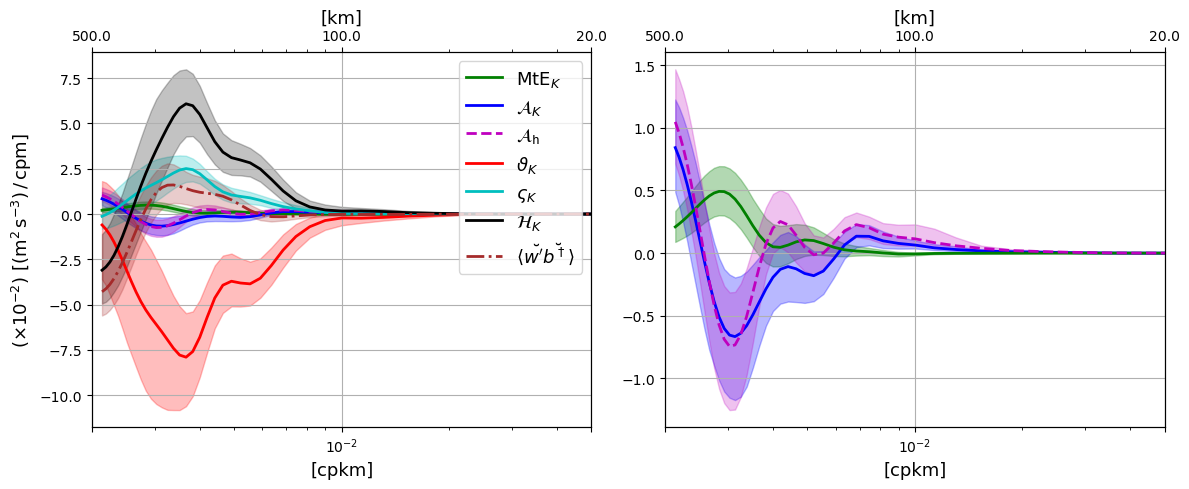

In [12]:
SP = (ds1.U + ds1.V)
SPk = SP.isel(time=slice(None,6)
             ).sum('angle').mean(['time']).mean(['nmemb']).compute()
    
    # ds5 = xr.open_dataset(op.join(spec,'Points/%s/%010d/isoDiags_u_forcing.zarr' 
    #                               % (sreg[reg],iiter))
    #                      )
    # ds6 = xr.open_dataset(op.join(spec,'Points/%s/%010d/isoDiags_v_forcing.zarr' 
    #                               % (sreg[reg],iiter))
    #                      )
    # if nz == 0:
    #     datas = ((ds5.iso_uF + ds6.iso_vF).isel(Z=nz).sum('angle')
    #              * np.diff(ds0.angle)[0]*2*1e2,)  # samples must be in a sequence
    #     rng = np.random.default_rng()
    #     Fres = bootstrap(datas, np.mean, confidence_level=0.95,
    #                      random_state=rng)
    #     Fk = (ds5.iso_uF + ds6.iso_vF).mean(['nmemb']).isel(Z=nz).sum('angle').compute()

datas = (SP.isel(time=slice(None,6)
                ).sum('angle').mean('time').transpose('nmemb','scale')
# datas = (SP.isel(time=slice(None,6)).sum('angle').stack(zeta=("time", "nmemb")
#                                                        ).transpose('zeta','scale')
         * np.diff(ds1.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
SPres = bootstrap(datas, np.mean, confidence_level=0.95,
                 random_state=rng)
    # datas = ((ds0.iso_uA + ds1.iso_vA - MtE).isel(Z=nz).sum('angle')
    #          * np.diff(ds0.angle)[0]*2*1e2,)  # samples must be in a sequence
del datas
datas = (((ds0.U + ds0.V
        # ds0.iso_uA + ds1.iso_vA
          ) - SP
         ).isel(time=slice(None,6)
               ).sum('angle').mean('time').transpose('nmemb','scale')
# datas = (((ds0.U + ds0.V
#         # ds0.iso_uA + ds1.iso_vA
#           ) - SP
#          ).isel(time=slice(None,6)).sum('angle').stack(zeta=("time", "nmemb")
#                                                       ).transpose('zeta','scale')
         * np.diff(ds0.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Ares = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas 
Ak = ((ds0.U + ds0.V
           # ds0.iso_uA + ds1.iso_vA
          )
          # - MtE
      - SP
     ).isel(time=slice(None,6)
           ).sum('angle').mean(['time']).mean('nmemb').compute()
    # MtEk = MtE.mean(['nmemb']).sum('angle').compute()
#######################
datas = ((ds5.U + ds5.V
         ).isel(time=slice(None,6)
               ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = ((ds5.U + ds5.V
#          ).isel(time=slice(None,6)).sum('angle').stack(zeta=("time", "nmemb")
#                                                       ).transpose('zeta','scale')
         * np.diff(ds5.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
HAres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas   
HAk = (ds5.U + ds5.V
      ).isel(time=slice(None,6)
            ).sum('angle').mean(['time']).mean('nmemb').compute()
######################
datas = ((ds2.U + ds2.V + ds2.W
         ).isel(time=slice(None,6)
               ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = ((ds2.U + ds2.V + ds2.W
#          ).isel(time=slice(None,6)).sum('angle').stack(zeta=("time", "nmemb")
#                                                       ).transpose('zeta','scale')
         * np.diff(ds2.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Tres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Tk = (ds2.U + ds2.V + ds2.W
     ).isel(time=slice(None,6)
           ).mean(['time']).mean('nmemb').sum('angle').compute()
#######################
datas = ((ds3.U + ds3.V + ds3.W
         ).isel(time=slice(None,6)
               ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = ((ds3.U + ds3.V + ds3.W
#          ).isel(time=slice(None,6)).sum('angle').stack(zeta=("time", "nmemb")
#                                                       ).transpose('zeta','scale')
         * np.diff(ds3.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Sres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Sk = (ds3.U + ds3.V + ds3.W
     ).isel(time=slice(None,6)
           ).mean(['time']).mean('nmemb').sum('angle').compute()
#######################
datas = (-(ds4.U + ds4.V + ds4.W
         ).isel(time=slice(None,6)
               ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = (-(ds4.U + ds4.V + ds4.W
#          ).isel(time=slice(None,6)).sum('angle').stack(zeta=("time", "nmemb")
#                                                       ).transpose('zeta','scale')
         * np.diff(ds4.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Hres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Hk = -(ds4.U + ds4.V + ds4.W
     ).isel(time=slice(None,6)
           ).mean(['time']).mean('nmemb').sum('angle').compute()
#######################
datas = (ds6.W.isel(time=slice(None,6)
                   ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = (ds6.W.isel(time=slice(None,6)
#                    ).sum('angle').stack(zeta=("time", "nmemb")
#                                        ).transpose('zeta','scale')
         * np.diff(ds6.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Wres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Wk = ds6.W.isel(time=slice(None,6)
               ).mean(['time']).mean('nmemb').sum('angle').compute()
    
# res = Tk/86400. - (Pk + (dtau.iso_uA + dtav.iso_vA
#                              # ds0.iso_uA + ds1.iso_vA
#                             ).isel(Z=nz).mean(['nmemb']).sum('angle').compute() 
#                        + Dk + ABk
#                       )
#     if nz == 0:
#         res -= Fk
            
fig, (ax1,ax3) = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
# fig, ax = plt.subplots(figsize=(7,6))
fig.set_tight_layout(True)
ax2 = ax1.twiny()
ax4 = ax3.twiny()
    
ax1.fill_between((ds1.scale)**-1*1e3, 
                SPres.confidence_interval.high, 
                SPres.confidence_interval.low, 
                alpha=.32, color='g')
ax1.fill_between((ds0.scale)**-1*1e3, 
                Ares.confidence_interval.low, 
                Ares.confidence_interval.high, 
                alpha=.28, color='b')
ax1.fill_between((ds5.scale)**-1*1e3, 
                HAres.confidence_interval.low, 
                HAres.confidence_interval.high, 
                alpha=.28, color='m')
ax1.fill_between((ds2.scale)**-1*1e3, 
                Tres.confidence_interval.low, 
                Tres.confidence_interval.high, 
                alpha=.26, color='r')
ax1.fill_between((ds3.scale)**-1*1e3, 
                Sres.confidence_interval.low, 
                Sres.confidence_interval.high, 
                alpha=.26, color='c')
ax1.fill_between((ds4.scale)**-1*1e3, 
                Hres.confidence_interval.low, 
                Hres.confidence_interval.high, 
                alpha=.24, color='k')
ax1.fill_between((ds4.scale)**-1*1e3, 
                Wres.confidence_interval.low, 
                Wres.confidence_interval.high, 
                alpha=.24, color='brown')

ax3.fill_between((ds1.scale)**-1*1e3, 
                SPres.confidence_interval.high, 
                SPres.confidence_interval.low, 
                alpha=.3, color='g')
ax3.fill_between((ds0.scale)**-1*1e3, 
                Ares.confidence_interval.low, 
                Ares.confidence_interval.high, 
                alpha=.28, color='b')
ax3.fill_between((ds5.scale)**-1*1e3, 
                HAres.confidence_interval.low, 
                HAres.confidence_interval.high, 
                alpha=.24, color='m')
# if nz == 0:
#     ax.fill_between((ds0.scale)**-1*1e3, Fres.confidence_interval.low, 
#                         Fres.confidence_interval.high, 
#                         alpha=.26, color='c')
# ax.fill_between((ds0.scale)**-1*1e3, ABres.confidence_interval.low, 
#                     ABres.confidence_interval.high, 
#                     alpha=.24, color='orange')
    
ax1.plot((ds1.scale)**-1*1e3, 
        SPk*np.diff(ds1.angle)[0]*2*1e2,
        'g', lw=2, label=r"MtE$_K$")
ax1.plot((ds0.scale)**-1*1e3, 
        Ak*np.diff(ds0.angle)[0]*2*1e2,
        'b', lw=2, label=r"$\mathcal{A}_K$")
ax1.plot((ds5.scale)**-1*1e3, 
        HAk*np.diff(ds5.angle)[0]*2*1e2,
        'm--', lw=2, label=r"$\mathcal{A}_{\tt h}$")
ax1.plot((ds2.scale)**-1*1e3, 
        Tk*np.diff(ds2.angle)[0]*2*1e2,
        'r', lw=2, label=r"$\vartheta_K$")
ax1.plot((ds3.scale)**-1*1e3, 
        Sk*np.diff(ds3.angle)[0]*2*1e2,
        c='c', lw=2, label=r"$\varsigma_K$")
ax1.plot((ds4.scale)**-1*1e3, 
        Hk*np.diff(ds4.angle)[0]*2*1e2,
        c='k', lw=2, label=r"$\mathcal{H}_K$")
ax1.plot((ds6.scale)**-1*1e3, 
        Wk*np.diff(ds6.angle)[0]*2*1e2,
        color='brown', ls='-.', lw=2, 
        label=r"$\langle\breve{w'}\breve{b^\dagger}\rangle$")

ax3.plot((ds0.scale)**-1*1e3, 
        Ak*np.diff(ds0.angle)[0]*2*1e2,
        'b', lw=2, label=r"$\mathcal{A}_K$")
ax3.plot((ds1.scale)**-1*1e3, 
        SPk*np.diff(ds1.angle)[0]*2*1e2,
        'g', lw=2, label=r"MtE$_K$")
ax3.plot((ds5.scale)**-1*1e3, 
        HAk*np.diff(ds5.angle)[0]*2*1e2,
        'm--', lw=2, label=r"$\mathcal{A}_{\tt h}$")
# if nz == 0:
#     ax.plot((ds0.scale)**-1*1e3, Fk*np.diff(ds0.angle)[0]*2*1e2,
#                 'c', lw=3, label=r"$\mathcal{F}_K$")
# ax.plot((ds0.scale)**-1*1e3, ABk*np.diff(ds0.angle)[0]*2*1e2,
#             c='orange', lw=3, label=r"$AB_K$")
# ax.plot((ds0.scale)**-1*1e3, res*np.diff(ds0.angle)[0]*2*1e2, 
#             c='grey', ls='--', lw=2, label=r"Res.")

ax1.set_xscale('log')
#             ax.set_yscale('log')
ax2.set_xscale('log')
#             ax2.set_yscale('log')
ax1.set_xlim([2e-3,5e-2])
ax1.set_xticks([2e-3,1e-2,5e-2])
ax2.set_xlim([2e-3,5e-2])
ax2.set_xticks([2e-3,1e-2,5e-2])
ax2.set_xticklabels([5e2,1e2,2e1])
# Meta = np.abs(Pk.isel(Z=0)).max(skipna=True).values*1e3
# ax.set_ylim([-Meta*.7, Meta*.7])
ax1.set_xlabel(r"[cpkm]", fontsize=13)
ax2.set_xlabel(r"[km]", fontsize=13)
ax1.set_ylabel(r"($\times 10^{-2}$) [(m$^2\,$s$^{-3})\,/\,$cpm]", fontsize=13)
ax3.set_xscale('log')
#             ax.set_yscale('log')
ax4.set_xscale('log')
#             ax2.set_yscale('log')
ax3.set_xlim([2e-3,5e-2])
ax3.set_xticks([2e-3,1e-2,5e-2])
ax4.set_xlim([2e-3,5e-2])
ax4.set_xticks([2e-3,1e-2,5e-2])
ax4.set_xticklabels([5e2,1e2,2e1])
# Meta = np.abs(Pk.isel(Z=0)).max(skipna=True).values*1e3
# ax.set_ylim([-Meta*.7, Meta*.7])
ax3.set_xlabel(r"[cpkm]", fontsize=13)
ax4.set_xlabel(r"[km]", fontsize=13)
ax1.grid(True)
ax3.grid(True)
# if reg % 5 == 0:
ax1.legend(loc='upper right', fontsize=13)
plt.savefig(op.join(spec,'Figs/SpecKEtrans_Lat%03d_Lon%03d_Z452_JFM1967.pdf' 
                        % (ys[reg],xs[reg])))
plt.show()

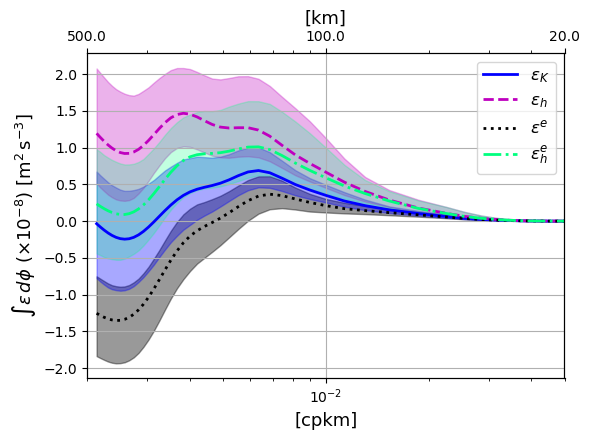

In [11]:
dks = xr.DataArray(np.abs(np.diff(ds0.scale**-1)).data, dims='scale',
                       coords={'scale':.5*(ds0.scale[1:].data 
                                           + ds0.scale[:-1].data)}
                      ).interp(scale=ds0.scale, 
                               kwargs={"fill_value": "extrapolate"})
    # MtE = (ds4.iso_uA + ds4.iso_vA)
SP = (ds1.U + ds1.V)
Ak = ((ds0.U + ds0.V)
      - SP
     )

piw = ((Ak * dks
       ).isel(time=slice(None,6)
             ).sum('angle').mean("time").transpose('nmemb','scale'
                               )[...,::-1].cumsum('scale')[...,::-1].compute() 
# piw = ((Ak * dks
#        ).isel(time=slice(None,6)).sum('angle').stack(zeta=("time", "nmemb")
#                     ).transpose('zeta','scale'
#                                )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (piw, )  # samples must be in a sequence
rng = np.random.default_rng()
Pwres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
HAk = (ds5.U + ds5.V)
piH = ((HAk * dks
       ).isel(time=slice(None,6)
             ).sum('angle').mean("time").transpose('nmemb','scale'
                               )[...,::-1].cumsum('scale')[...,::-1].compute() 
# piH = ((HAk * dks
#        ).isel(time=slice(None,6)).sum('angle').stack(zeta=("time", "nmemb")
#                     ).transpose('zeta','scale'
#                                )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (piH, )  # samples must be in a sequence
rng = np.random.default_rng()
PHres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
eAk = (ds7.U + ds7.V)
pie = ((eAk * dks
       ).isel(time=slice(None,6)
             ).sum('angle').mean("time").transpose('nmemb','scale'
                               )[...,::-1].cumsum('scale')[...,::-1].compute() 
# pie = ((eAk * dks
#        ).isel(time=slice(None,6)).sum('angle').stack(zeta=("time", "nmemb")
#                     ).transpose('zeta','scale'
#                                )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (pie, )  # samples must be in a sequence
rng = np.random.default_rng()
Peres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
hAk = (ds8.U + ds8.V)
pih = ((hAk * dks
       ).isel(time=slice(None,6)
             ).sum('angle').mean("time").transpose('nmemb','scale'
                               )[...,::-1].cumsum('scale')[...,::-1].compute() 
# pih = ((hAk * dks
#        ).isel(time=slice(None,6)).sum('angle').stack(zeta=("time", "nmemb")
#                     ).transpose('zeta','scale'
#                                )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (pih, )  # samples must be in a sequence
rng = np.random.default_rng()
Phres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
fig, ax = plt.subplots(figsize=(6,4.5))
fig.set_tight_layout(True)
    # ax2 = ax.twinx()
ax3 = ax.twiny()
    
ax.fill_between((ds0.scale)**-1*1e3, Peres.confidence_interval.low*1e8, 
                Peres.confidence_interval.high*1e8, 
                alpha=.4, color='k')
ax.fill_between((ds0.scale)**-1*1e3, Pwres.confidence_interval.low*1e8, 
                Pwres.confidence_interval.high*1e8, 
                alpha=.34, color='b')
ax.fill_between((ds0.scale)**-1*1e3, PHres.confidence_interval.low*1e8, 
                PHres.confidence_interval.high*1e8, 
                alpha=.3, color='m')
ax.fill_between((ds0.scale)**-1*1e3, Phres.confidence_interval.low*1e8, 
                Phres.confidence_interval.high*1e8, 
                alpha=.24, color='springgreen')
    
ax.plot((ds0.scale)**-1*1e3, piw.mean(['nmemb'])*1e8,
        'b', lw=2, label=r"$\varepsilon_K$")
ax.plot((ds0.scale)**-1*1e3, piH.mean(['nmemb'])*1e8,
        'm--', lw=2, label=r"$\varepsilon_h$")
ax.plot((ds0.scale)**-1*1e3, pie.mean(['nmemb'])*1e8,
        'k:', lw=2, label=r"$\varepsilon^e$")
ax.plot((ds0.scale)**-1*1e3, pih.mean(['nmemb'])*1e8,
        c='springgreen', ls='-.', lw=2, label=r"$\varepsilon^e_h$")
    
ax.set_xscale('log')
ax3.set_xscale('log')
ax.set_xlim([2e-3,5e-2])

ax3.set_xlim([2e-3,5e-2])
ax3.set_xticks([2e-3,1e-2,5e-2])
ax3.set_xticklabels([5e2,1e2,2e1])
ax.set_xlabel(r"[cpkm]", fontsize=13)
ax3.set_xlabel(r"[km]", fontsize=13)

ax.legend(loc='upper right', fontsize=12)

ax.set_ylabel(r"$\int\epsilon\,d\phi$ ($\times 10^{-8}$) [m$^2\,$s$^{-3}$]", 
                  fontsize=13)

ax.grid(True)
plt.savefig(op.join(spec,'Figs/WKE-specflux_Region%02d_Z452_JFM1967.pdf' 
                    % reg))
plt.show()

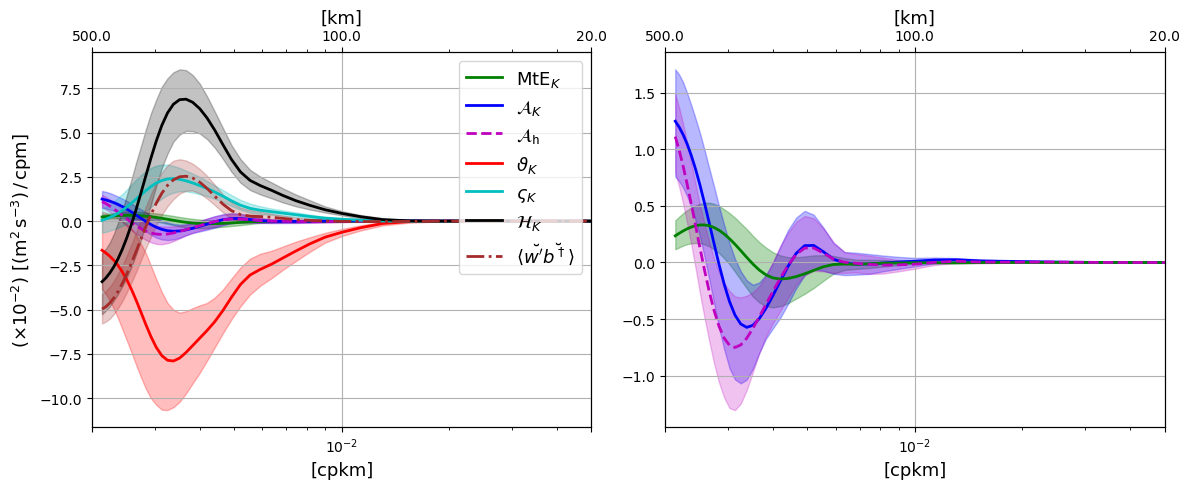

In [13]:
SP = (ds1.U + ds1.V)
SPk = SP.isel(time=slice(-6,None)
             ).sum('angle').mean(['time']).mean('nmemb').compute()
    
    # ds5 = xr.open_dataset(op.join(spec,'Points/%s/%010d/isoDiags_u_forcing.zarr' 
    #                               % (sreg[reg],iiter))
    #                      )
    # ds6 = xr.open_dataset(op.join(spec,'Points/%s/%010d/isoDiags_v_forcing.zarr' 
    #                               % (sreg[reg],iiter))
    #                      )
    # if nz == 0:
    #     datas = ((ds5.iso_uF + ds6.iso_vF).isel(Z=nz).sum('angle')
    #              * np.diff(ds0.angle)[0]*2*1e2,)  # samples must be in a sequence
    #     rng = np.random.default_rng()
    #     Fres = bootstrap(datas, np.mean, confidence_level=0.95,
    #                      random_state=rng)
    #     Fk = (ds5.iso_uF + ds6.iso_vF).mean(['nmemb']).isel(Z=nz).sum('angle').compute()

datas = (SP.isel(time=slice(-6,None)
                ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = (SP.isel(time=slice(-6,None)).sum('angle').stack(zeta=("time", "nmemb")
#                                                        ).transpose('zeta','scale')
         * np.diff(ds1.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
SPres = bootstrap(datas, np.mean, confidence_level=0.95,
                  random_state=rng)
    # datas = ((ds0.iso_uA + ds1.iso_vA - MtE).isel(Z=nz).sum('angle')
    #          * np.diff(ds0.angle)[0]*2*1e2,)  # samples must be in a sequence
del datas
datas = (((ds0.U + ds0.V
        # ds0.iso_uA + ds1.iso_vA
          ) - SP
         ).isel(time=slice(-6,None)
               ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = (((ds0.U + ds0.V
#         # ds0.iso_uA + ds1.iso_vA
#           ) - SP
#          ).isel(time=slice(-6,None)).sum('angle').stack(zeta=("time", "nmemb")
#                                                       ).transpose('zeta','scale')
         * np.diff(ds0.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Ares = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas 
Ak = ((ds0.U + ds0.V
           # ds0.iso_uA + ds1.iso_vA
          )
          # - MtE
      - SP
     ).isel(time=slice(-6,None)
           ).sum('angle').mean(['time']).mean('nmemb').compute()
    # MtEk = MtE.mean(['nmemb']).sum('angle').compute()
#######################
datas = ((ds5.U + ds5.V
         ).isel(time=slice(-6,None)
               ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = ((ds5.U + ds5.V
#          ).isel(time=slice(-6,None)).sum('angle').stack(zeta=("time", "nmemb")
#                                                       ).transpose('zeta','scale')
         * np.diff(ds5.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
HAres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas   
HAk = (ds5.U + ds5.V
      ).isel(time=slice(-6,None)
            ).sum('angle').mean(['time']).mean('nmemb').compute()
######################
datas = ((ds2.U + ds2.V + ds2.W
         ).isel(time=slice(-6,None)
               ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = ((ds2.U + ds2.V + ds2.W
#          ).isel(time=slice(-6,None)).sum('angle').stack(zeta=("time", "nmemb")
#                                                       ).transpose('zeta','scale')
         * np.diff(ds2.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Tres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Tk = (ds2.U + ds2.V + ds2.W
     ).isel(time=slice(-6,None)).mean(['time']).mean('nmemb').sum('angle').compute()
#######################
datas = ((ds3.U + ds3.V + ds3.W
         ).isel(time=slice(-6,None)
               ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = ((ds3.U + ds3.V + ds3.W
#          ).isel(time=slice(-6,None)).sum('angle').stack(zeta=("time", "nmemb")
#                                                        ).transpose('zeta','scale')
         * np.diff(ds3.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Sres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Sk = (ds3.U + ds3.V + ds3.W
     ).isel(time=slice(-6,None)
           ).mean(['time']).mean('nmemb').sum('angle').compute()
#######################
datas = (-(ds4.U + ds4.V + ds4.W
         ).isel(time=slice(-6,None)
               ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = (-(ds4.U + ds4.V + ds4.W
#          ).isel(time=slice(-6,None)).sum('angle').stack(zeta=("time", "nmemb")
#                                                       ).transpose('zeta','scale')
         * np.diff(ds4.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Hres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Hk = -(ds4.U + ds4.V + ds4.W
     ).isel(time=slice(-6,None)
           ).mean(['time']).mean('nmemb').sum('angle').compute()
#######################
datas = (ds6.W.isel(time=slice(-6,None)
                   ).sum('angle').mean("time").transpose('nmemb','scale')
# datas = (ds6.W.isel(time=slice(-6,None)
#                    ).sum('angle').stack(zeta=("time", "nmemb")
#                                        ).transpose('zeta','scale')
         * np.diff(ds6.angle)[0]*2*1e2,)  # samples must be in a sequence
rng = np.random.default_rng()
Wres = bootstrap(datas, np.mean, confidence_level=0.95,
                random_state=rng)
del datas    
Wk = ds6.W.isel(time=slice(-6,None)
               ).mean(['time']).mean('nmemb').sum('angle').compute()
    
# res = Tk/86400. - (Pk + (dtau.iso_uA + dtav.iso_vA
#                              # ds0.iso_uA + ds1.iso_vA
#                             ).isel(Z=nz).mean(['nmemb']).sum('angle').compute() 
#                        + Dk + ABk
#                       )
#     if nz == 0:
#         res -= Fk
            
fig, (ax1,ax3) = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
# fig, ax = plt.subplots(figsize=(7,6))
fig.set_tight_layout(True)
ax2 = ax1.twiny()
ax4 = ax3.twiny()
    
ax1.fill_between((ds1.scale)**-1*1e3, 
                SPres.confidence_interval.high, 
                SPres.confidence_interval.low, 
                alpha=.32, color='g')
ax1.fill_between((ds0.scale)**-1*1e3, 
                Ares.confidence_interval.low, 
                Ares.confidence_interval.high, 
                alpha=.28, color='b')
ax1.fill_between((ds5.scale)**-1*1e3, 
                HAres.confidence_interval.low, 
                HAres.confidence_interval.high, 
                alpha=.28, color='m')
ax1.fill_between((ds2.scale)**-1*1e3, 
                Tres.confidence_interval.low, 
                Tres.confidence_interval.high, 
                alpha=.26, color='r')
ax1.fill_between((ds3.scale)**-1*1e3, 
                Sres.confidence_interval.low, 
                Sres.confidence_interval.high, 
                alpha=.26, color='c')
ax1.fill_between((ds4.scale)**-1*1e3, 
                Hres.confidence_interval.low, 
                Hres.confidence_interval.high, 
                alpha=.24, color='k')
ax1.fill_between((ds4.scale)**-1*1e3, 
                Wres.confidence_interval.low, 
                Wres.confidence_interval.high, 
                alpha=.24, color='brown')

ax3.fill_between((ds1.scale)**-1*1e3, 
                SPres.confidence_interval.high, 
                SPres.confidence_interval.low, 
                alpha=.3, color='g')
ax3.fill_between((ds0.scale)**-1*1e3, 
                Ares.confidence_interval.low, 
                Ares.confidence_interval.high, 
                alpha=.28, color='b')
ax3.fill_between((ds5.scale)**-1*1e3, 
                HAres.confidence_interval.low, 
                HAres.confidence_interval.high, 
                alpha=.24, color='m')
# if nz == 0:
#     ax.fill_between((ds0.scale)**-1*1e3, Fres.confidence_interval.low, 
#                         Fres.confidence_interval.high, 
#                         alpha=.26, color='c')
# ax.fill_between((ds0.scale)**-1*1e3, ABres.confidence_interval.low, 
#                     ABres.confidence_interval.high, 
#                     alpha=.24, color='orange')
    
ax1.plot((ds1.scale)**-1*1e3, 
        SPk*np.diff(ds1.angle)[0]*2*1e2,
        'g', lw=2, label=r"MtE$_K$")
ax1.plot((ds0.scale)**-1*1e3, 
        Ak*np.diff(ds0.angle)[0]*2*1e2,
        'b', lw=2, label=r"$\mathcal{A}_K$")
ax1.plot((ds5.scale)**-1*1e3, 
        HAk*np.diff(ds5.angle)[0]*2*1e2,
        'm--', lw=2, label=r"$\mathcal{A}_{\tt h}$")
ax1.plot((ds2.scale)**-1*1e3, 
        Tk*np.diff(ds2.angle)[0]*2*1e2,
        'r', lw=2, label=r"$\vartheta_K$")
ax1.plot((ds3.scale)**-1*1e3, 
        Sk*np.diff(ds3.angle)[0]*2*1e2,
        c='c', lw=2, label=r"$\varsigma_K$")
ax1.plot((ds4.scale)**-1*1e3, 
        Hk*np.diff(ds4.angle)[0]*2*1e2,
        c='k', lw=2, label=r"$\mathcal{H}_K$")
ax1.plot((ds6.scale)**-1*1e3, 
        Wk*np.diff(ds6.angle)[0]*2*1e2,
        color='brown', ls='-.', lw=2, 
        label=r"$\langle\breve{w'}\breve{b^\dagger}\rangle$")

ax3.plot((ds0.scale)**-1*1e3, 
        Ak*np.diff(ds0.angle)[0]*2*1e2,
        'b', lw=2, label=r"$\mathcal{A}_K$")
ax3.plot((ds1.scale)**-1*1e3, 
        SPk*np.diff(ds1.angle)[0]*2*1e2,
        'g', lw=2, label=r"MtE$_K$")
ax3.plot((ds5.scale)**-1*1e3, 
        HAk*np.diff(ds5.angle)[0]*2*1e2,
        'm--', lw=2, label=r"$\mathcal{A}_{\tt h}$")
# if nz == 0:
#     ax.plot((ds0.scale)**-1*1e3, Fk*np.diff(ds0.angle)[0]*2*1e2,
#                 'c', lw=3, label=r"$\mathcal{F}_K$")
# ax.plot((ds0.scale)**-1*1e3, ABk*np.diff(ds0.angle)[0]*2*1e2,
#             c='orange', lw=3, label=r"$AB_K$")
# ax.plot((ds0.scale)**-1*1e3, res*np.diff(ds0.angle)[0]*2*1e2, 
#             c='grey', ls='--', lw=2, label=r"Res.")

ax1.set_xscale('log')
#             ax.set_yscale('log')
ax2.set_xscale('log')
#             ax2.set_yscale('log')
ax1.set_xlim([2e-3,5e-2])
ax1.set_xticks([2e-3,1e-2,5e-2])
ax2.set_xlim([2e-3,5e-2])
ax2.set_xticks([2e-3,1e-2,5e-2])
ax2.set_xticklabels([5e2,1e2,2e1])
# Meta = np.abs(Pk.isel(Z=0)).max(skipna=True).values*1e3
# ax.set_ylim([-Meta*.7, Meta*.7])
ax1.set_xlabel(r"[cpkm]", fontsize=13)
ax2.set_xlabel(r"[km]", fontsize=13)
ax1.set_ylabel(r"($\times 10^{-2}$) [(m$^2\,$s$^{-3})\,/\,$cpm]", fontsize=13)
ax3.set_xscale('log')
#             ax.set_yscale('log')
ax4.set_xscale('log')
#             ax2.set_yscale('log')
ax3.set_xlim([2e-3,5e-2])
ax3.set_xticks([2e-3,1e-2,5e-2])
ax4.set_xlim([2e-3,5e-2])
ax4.set_xticks([2e-3,1e-2,5e-2])
ax4.set_xticklabels([5e2,1e2,2e1])
# Meta = np.abs(Pk.isel(Z=0)).max(skipna=True).values*1e3
# ax.set_ylim([-Meta*.7, Meta*.7])
ax3.set_xlabel(r"[cpkm]", fontsize=13)
ax4.set_xlabel(r"[km]", fontsize=13)
ax1.grid(True)
ax3.grid(True)
# if reg % 5 == 0:
ax1.legend(loc='upper right', fontsize=13)
plt.savefig(op.join(spec,'Figs/SpecKEtrans_Lat%03d_Lon%03d_Z452_JAS1967.pdf' 
                        % (ys[reg],xs[reg])))
plt.show()

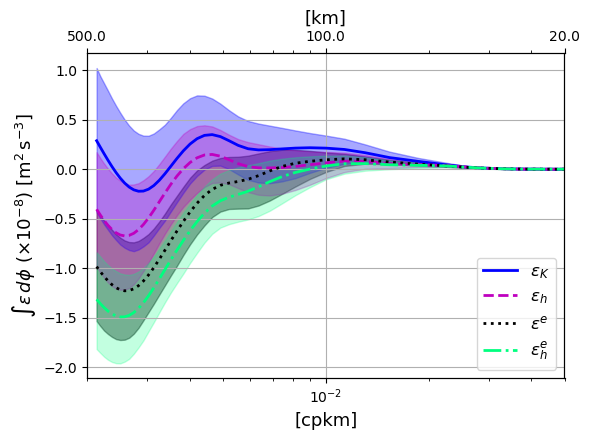

In [14]:
dks = xr.DataArray(np.abs(np.diff(ds0.scale**-1)).data, dims='scale',
                       coords={'scale':.5*(ds0.scale[1:].data 
                                           + ds0.scale[:-1].data)}
                      ).interp(scale=ds0.scale, 
                               kwargs={"fill_value": "extrapolate"})
    # MtE = (ds4.iso_uA + ds4.iso_vA)
SP = (ds1.U + ds1.V)
Ak = ((ds0.U + ds0.V)
      - SP
     )

piw = ((Ak * dks
       ).isel(time=slice(-6,None)
             ).sum('angle').mean("time").transpose('nmemb','scale'
                               )[...,::-1].cumsum('scale')[...,::-1].compute() 
# piw = ((Ak * dks
#        ).isel(time=slice(-6,None)
#              ).sum('angle').stack(zeta=("time", "nmemb")
#                     ).transpose('zeta','scale'
#                                )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (piw, )  # samples must be in a sequence
rng = np.random.default_rng()
Pwres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
HAk = (ds5.U + ds5.V)
piH = ((HAk * dks
       ).isel(time=slice(-6,None)
             ).sum('angle').mean("time").transpose('nmemb','scale'
                               )[...,::-1].cumsum('scale')[...,::-1].compute()
# piH = ((HAk * dks
#        ).isel(time=slice(-6,None)).sum('angle').stack(zeta=("time", "nmemb")
#                     ).transpose('zeta','scale'
#                                )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (piH, )  # samples must be in a sequence
rng = np.random.default_rng()
PHres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
eAk = (ds7.U + ds7.V)
pie = ((eAk * dks
       ).isel(time=slice(-6,None)
             ).sum('angle').mean("time").transpose('nmemb','scale'
                               )[...,::-1].cumsum('scale')[...,::-1].compute() 
# pie = ((eAk * dks
#        ).isel(time=slice(-6,None)).sum('angle').stack(zeta=("time", "nmemb")
#                     ).transpose('zeta','scale'
#                                )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (pie, )  # samples must be in a sequence
rng = np.random.default_rng()
Peres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
hAk = (ds8.U + ds8.V)
pih = ((hAk * dks
       ).isel(time=slice(-6,None)
             ).sum('angle').mean("time").transpose('nmemb','scale'
                               )[...,::-1].cumsum('scale')[...,::-1].compute() 
# pih = ((hAk * dks
#        ).isel(time=slice(-6,None)).sum('angle').stack(zeta=("time", "nmemb")
#                     ).transpose('zeta','scale'
#                                )[...,::-1].cumsum('scale')[...,::-1].compute() 
       * np.diff(ds0.angle)[0]*2)
datas = (pih, )  # samples must be in a sequence
rng = np.random.default_rng()
Phres = bootstrap(datas, np.mean, confidence_level=0.95,
                      # n_resamples=100,
                  random_state=rng)
del datas
#######################
fig, ax = plt.subplots(figsize=(6,4.5))
fig.set_tight_layout(True)
    # ax2 = ax.twinx()
ax3 = ax.twiny()

ax.fill_between((ds0.scale)**-1*1e3, Peres.confidence_interval.low*1e8, 
                Peres.confidence_interval.high*1e8, 
                alpha=.4, color='k')
ax.fill_between((ds0.scale)**-1*1e3, Pwres.confidence_interval.low*1e8, 
                Pwres.confidence_interval.high*1e8, 
                alpha=.34, color='b')
ax.fill_between((ds0.scale)**-1*1e3, PHres.confidence_interval.low*1e8, 
                PHres.confidence_interval.high*1e8, 
                alpha=.3, color='m')
ax.fill_between((ds0.scale)**-1*1e3, Phres.confidence_interval.low*1e8, 
                Phres.confidence_interval.high*1e8, 
                alpha=.24, color='springgreen')
    
ax.plot((ds0.scale)**-1*1e3, piw.mean(['nmemb'])*1e8,
        'b', lw=2, label=r"$\varepsilon_K$")
ax.plot((ds0.scale)**-1*1e3, piH.mean(['nmemb'])*1e8,
        'm--', lw=2, label=r"$\varepsilon_h$")
ax.plot((ds0.scale)**-1*1e3, pie.mean(['nmemb'])*1e8,
        'k:', lw=2, label=r"$\varepsilon^e$")
ax.plot((ds0.scale)**-1*1e3, pih.mean(['nmemb'])*1e8,
        c='springgreen', ls='-.', lw=2, label=r"$\varepsilon^e_h$")
    
ax.set_xscale('log')
ax3.set_xscale('log')
ax.set_xlim([2e-3,5e-2])

ax3.set_xlim([2e-3,5e-2])
ax3.set_xticks([2e-3,1e-2,5e-2])
ax3.set_xticklabels([5e2,1e2,2e1])
ax.set_xlabel(r"[cpkm]", fontsize=13)
ax3.set_xlabel(r"[km]", fontsize=13)

ax.legend(loc='lower right', fontsize=12)

ax.set_ylabel(r"$\int\epsilon\,d\phi$ ($\times 10^{-8}$) [m$^2\,$s$^{-3}$]", 
                  fontsize=13)

ax.grid(True)
plt.savefig(op.join(spec,'Figs/WKE-specflux_Region%02d_Z452_JAS1967.pdf' % reg))
plt.show()

## Spatial Maps

In [6]:
critt = .7

In [9]:
ystart = ySstart
nmembs = np.arange(100,148)

yystart = 0
yys = yystart
dsm = open_mdsdataset(op.join(ddir,'ensm/run%4d/ocn/' 
                              % (years[yystart])), 
                      grid_dir=gdir,
                      prefix=['snap_diagOcn',], 
                      delta_t=2e2, iters=ntimes[0,0]                              
                     ).isel(time=0
                           ).chunk({'YC':ychunk,'YG':ychunk,
                                    'XC':xchunk,'XG':xchunk})
coords = {
        # "T": {"center": "time"},
        "X": {"center": "XC",     "left" : "XG"},
        "Y": {"center": "YC",     "left" : "YG"},
        "Z": {"center": "Z" ,     "outer": "Zp1", 
              "left"  : "Zl",     "right": "Zu"}
        }
grid = Grid(dsm, periodic=['X'],
            coords=coords)
KEflux_full = xr.DataArray(np.ones((25,len(np.arange(ystart+5,yend+10,5)),
                               len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                              )), dims=['time','YC','XC'], 
                      coords={'time':range(25),
                              'YC':np.arange(ystart+5,yend+10,5),
                              'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                     ) * np.nan
KEflux = xr.DataArray(np.ones((25,len(np.arange(ystart+5,yend+10,5)),
                               len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                              )), dims=['time','YC','XC'], 
                      coords={'time':range(25),
                              'YC':np.arange(ystart+5,yend+10,5),
                              'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                     ) * np.nan
length = 120e3

for year in years[yystart:yystart+1]:
    if year == years[yystart]:
        mtimes = ntimes[yys]
    else:
        mtimes = ntimes[yys]
    
    im = 0
    for itime in mtimes[::3]:       
        iy = 0
        for lat in np.arange(ystart,yend+5,5)[:-1]:
            mask = dsm.maskC.isel(Z=18).sel(YC=slice(lat,lat+10)
                                           ).reset_coords(drop=True)
            ix = 0
            for lon in np.arange(dsm.XC.min()-2.5,dsm.XC.max(),5):    
                xend = lon + 10
                if lon < dsm.XC.min():
                    dlon = dsm.XC.min() - lon
                    m = mask.sel(XC=slice(None,xend))
                    mm = mask.sel(XC=slice(dsm.XC.max()-dlon,None))
                    mmm = xr.concat([xr.DataArray(mm.data, dims=['YC','XC'],
                                          coords={'YC':m.YC,
                                                  'XC':np.linspace(lon,
                                                                   lon+dlon,
                                                                   num=len(mm.XC)+1,
                                                                   endpoint=False)[1:]}
                                                 ),
                                     m
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Adv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                            fname1 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/ShProd/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Adv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                            fname1 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/ShProd/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        ds1_trans = xr.open_zarr(op.join(spec,fname1))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                       coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                           + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = ((ds0_trans.U + ds0_trans.V)
                              - (ds1_trans.U + ds1_trans.V)
                             )

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            KEflux_full[dict(time=im,YC=iy,XC=ix)
                                       ] = piw.sel(scale=length, method='nearest'
                                                           )   
                        else:
                            KEflux[dict(time=im,YC=iy,XC=ix)
                                  ] = piw.sel(scale=length, method='nearest'
                                                           )   
                elif xend > dsm.XC.max():
                    dlon = -dsm.XC.max() + xend
                    m = mask.sel(XC=slice(lon,None))
                    mm = mask.sel(XC=slice(None,dsm.XC.min()+dlon))
                    mmm = xr.concat([m,
                                     xr.DataArray(mm.data, dims=['YC','XC'],
                                          coords={'YC':m.YC,
                                                  'XC':np.linspace(dsm.XC.max(),
                                                                   dsm.XC.max()+dlon,
                                                                   num=len(mm.XC)+1,
                                                                   endpoint=False)[1:]}
                                                 )
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Adv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                            fname1 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/ShProd/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Adv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                            fname1 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/ShProd/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        ds1_trans = xr.open_zarr(op.join(spec,fname1))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                       coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                           + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = ((ds0_trans.U + ds0_trans.V)
                              - (ds1_trans.U + ds1_trans.V)
                             )

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            KEflux_full[dict(time=im,YC=iy,XC=ix)
                                       ] = piw.sel(scale=length, method='nearest'
                                                           )   
                        else:
                            KEflux[dict(time=im,YC=iy,XC=ix)
                                  ] = piw.sel(scale=length, method='nearest'
                                                           )   
                else:
                    mmm = mask.sel(XC=slice(lon,xend))
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Adv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                            fname1 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/ShProd/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Adv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                            fname1 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/ShProd/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        ds1_trans = xr.open_zarr(op.join(spec,fname1))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                               + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = ((ds0_trans.U + ds0_trans.V)
                              - (ds1_trans.U + ds1_trans.V)
                             )

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            KEflux_full[dict(time=im,YC=iy,XC=ix)
                                       ] = piw.sel(scale=length, method='nearest'
                                                           )   
                        else:
                            KEflux[dict(time=im,YC=iy,XC=ix)
                                  ] = piw.sel(scale=length, method='nearest'
                                                           )   
                
                ds0_trans.close()
                ds1_trans.close()
                ix += 1
            iy += 1

        dsm.close()
        im += 1
        print(itime)
    yys += 1

# KEflux[dict(XC=0)] = KEflux.isel(XC=-1)
KEflux

1419120
1425600
1432080
1438560
1445040
1451520
1458000
1464480
1470960
1477440
1483920
1490400
1496880
1503360
1509840
1516320
1522800
1529280
1535760
1542240
1548720
1555200
1561680
1568160
1574640


<xarray.DataArray (time: 25, YC: 15, XC: 18)>
array([[[ 1.32920050e-11,  1.41831647e-11,  1.65290557e-11, ...,
                     nan,             nan,  8.31978259e-12],
        [ 1.59821491e-11,  9.88811146e-12,  5.91259954e-12, ...,
                     nan,  2.17218621e-11,  2.15722351e-11],
        [-1.18344673e-11, -1.29389193e-11,  2.28105876e-11, ...,
                     nan, -1.74644814e-11,  6.20458076e-12],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,  7.86318962e-11,  6.36249089e-11],
        [            nan,             nan,             nan, ...,
                     nan, -5.10565786e-10,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 5.74695985e-12,  7.61682326e-12,  2.39382935e-11, ...,
                     nan,             nan,  4.19365241e-12],
        [ 1.68124470e-11,  1.08135481e-11,  8.85751508e-12, ...,
                     nan,  3.52219924e-11,  1.94591441e-11],
        [ 4.46945421e-11,  4.97627590e-11,  3.67221396e-11, ...,
                     nan,  2.27453606e-11,  4.04821581e-11],
...
        [            nan,             nan,             nan, ...,
                     nan,  1.58481494e-10,  3.72282150e-12],
        [            nan,             nan,             nan, ...,
                     nan, -3.78295529e-10,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 1.14057272e-11,  1.74153730e-11,  1.87491658e-11, ...,
                     nan,             nan,  1.02583920e-11],
        [ 9.51917918e-12,  1.37885142e-11,  1.58131912e-11, ...,
                     nan,  1.64673604e-11,  9.58256149e-12],
        [ 3.26384545e-12,  1.39035574e-11,  2.32898146e-11, ...,
                     nan,  1.23924688e-11, -6.39839898e-12],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,  1.76372125e-10,  1.79513918e-10],
        [            nan,             nan,             nan, ...,
                     nan,  4.11533395e-10,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23 24
  * YC       (YC) float64 -14.8 -9.8 -4.8 0.2 5.2 ... 35.2 40.2 45.2 50.2 55.2
  * XC       (XC) float64 264.5 269.5 274.5 279.5 ... 334.5 339.5 344.5 349.5

In [10]:
ystart = ySstart
nmembs = np.arange(100,148)

yys = yystart
dsm = open_mdsdataset(op.join(ddir,'ensm/run%4d/ocn/' 
                              % (years[yystart])), 
                      grid_dir=gdir,
                      prefix=['snap_diagOcn',], 
                      delta_t=2e2, iters=ntimes[0,0]                              
                     ).isel(time=0
                           ).chunk({'YC':ychunk,'YG':ychunk,
                                    'XC':xchunk,'XG':xchunk})
coords = {
        # "T": {"center": "time"},
        "X": {"center": "XC",     "left" : "XG"},
        "Y": {"center": "YC",     "left" : "YG"},
        "Z": {"center": "Z" ,     "outer": "Zp1", 
              "left"  : "Zl",     "inner": "Zu"}
        }
grid = Grid(dsm, periodic=['X'],
            coords=coords)
hKEflux_full = xr.DataArray(np.ones((25,len(np.arange(ystart+5,yend+10,5)),
                                   len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                                  )), dims=['time','YC','XC'], 
                          coords={'time':range(25),
                                  'YC':np.arange(ystart+5,yend+10,5),
                                  'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                         ) * np.nan
hKEflux = xr.DataArray(np.ones((25,len(np.arange(ystart+5,yend+10,5)),
                               len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                              )), dims=['time','YC','XC'], 
                      coords={'time':range(25),
                              'YC':np.arange(ystart+5,yend+10,5),
                              'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                     ) * np.nan
# length = 400e3

for year in years[yystart:yystart+1]:
    if year == years[yystart]:
        mtimes = ntimes[yys]
    else:
        mtimes = ntimes[yys]
    
    im = 0
    for itime in mtimes[::3]:       
        iy = 0
        for lat in np.arange(ystart,yend+5,5)[:-1]:
            mask = dsm.maskC.isel(Z=18).sel(YC=slice(lat,lat+10)
                                           ).reset_coords(drop=True)
            ix = 0
            for lon in np.arange(dsm.XC.min()-2.5,dsm.XC.max(),5):    
                xend = lon + 10
                if lon < dsm.XC.min():
                    dlon = dsm.XC.min() - lon
                    m = mask.sel(XC=slice(None,xend))
                    mm = mask.sel(XC=slice(dsm.XC.max()-dlon,None))
                    mmm = xr.concat([xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(lon,
                                                                           lon+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 ),
                                     m
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/HorAdv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/HorAdv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                               + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = (ds0_trans.U + ds0_trans.V)

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            hKEflux_full[dict(time=im,YC=iy,XC=ix)
                                         ] = piw.sel(scale=length, method='nearest'
                                                           )   
                        else:
                            hKEflux[dict(time=im,YC=iy,XC=ix)
                                   ] = piw.sel(scale=length, method='nearest'
                                                           )   
                elif xend > dsm.XC.max():
                    dlon = -dsm.XC.max() + xend
                    m = mask.sel(XC=slice(lon,None))
                    mm = mask.sel(XC=slice(None,dsm.XC.min()+dlon))
                    mmm = xr.concat([m,
                                     xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(dsm.XC.max(),
                                                                           dsm.XC.max()+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 )
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/HorAdv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/HorAdv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                               + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = (ds0_trans.U + ds0_trans.V)

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            hKEflux_full[dict(time=im,YC=iy,XC=ix)] = piw.sel(scale=length, 
                                                                              method='nearest'
                                                           )   
                        else:
                            hKEflux[dict(time=im,YC=iy,XC=ix)
                                   ] = piw.sel(scale=length, method='nearest'
                                                           )   
                else:
                    mmm = mask.sel(XC=slice(lon,xend))
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/HorAdv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/HorAdv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                               + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = (ds0_trans.U + ds0_trans.V)

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            hKEflux_full[dict(time=im,YC=iy,XC=ix)] = piw.sel(scale=length, 
                                                                              method='nearest'
                                                           )   
                        else:
                            hKEflux[dict(time=im,YC=iy,XC=ix)
                                   ] = piw.sel(scale=length, method='nearest'
                                                           )      
                
                ds0_trans.close()
                ix += 1
            iy += 1

        dsm.close()
        im += 1
        print(itime)
    yys += 1

# KEflux[dict(XC=0)] = KEflux.isel(XC=-1)
hKEflux

1419120
1425600
1432080
1438560
1445040
1451520
1458000
1464480
1470960
1477440
1483920
1490400
1496880
1503360
1509840
1516320
1522800
1529280
1535760
1542240
1548720
1555200
1561680
1568160
1574640


<xarray.DataArray (time: 25, YC: 15, XC: 18)>
array([[[ 8.12259376e-12,  3.52446674e-12,  2.32819122e-12, ...,
                     nan,             nan,  3.31097820e-12],
        [ 2.74672950e-12,  1.02592525e-11, -2.05656948e-12, ...,
                     nan, -5.04605382e-12,  1.32825826e-12],
        [-2.81891149e-11, -2.52473708e-11,  1.65050658e-12, ...,
                     nan, -2.06377240e-11,  3.87894854e-12],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,  2.60566802e-11,  4.40388181e-12],
        [            nan,             nan,             nan, ...,
                     nan, -2.17417030e-10,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 7.43522114e-12, -8.31094672e-14,  1.69984839e-12, ...,
                     nan,             nan,  1.74548161e-12],
        [ 2.11083037e-12,  5.78432800e-12,  1.61651965e-12, ...,
                     nan,  1.54478669e-11, -1.97356680e-12],
        [ 5.20642509e-11,  5.12778956e-11,  3.16270948e-11, ...,
                     nan,  1.37048205e-11,  3.31094866e-11],
...
        [            nan,             nan,             nan, ...,
                     nan, -3.21508340e-11, -6.16074502e-11],
        [            nan,             nan,             nan, ...,
                     nan, -5.39397277e-10,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-1.36462121e-11,  7.59054130e-12, -9.31436307e-14, ...,
                     nan,             nan, -3.35410189e-12],
        [-2.19601313e-12,  2.95483061e-13,  6.83654500e-12, ...,
                     nan,  3.22206294e-12,  4.22362651e-12],
        [-4.48234415e-13,  1.43167619e-11,  9.20750449e-12, ...,
                     nan, -7.73236743e-12, -3.04731924e-11],
        ...,
        [            nan,             nan,             nan, ...,
                     nan, -5.63949486e-11, -4.07146898e-11],
        [            nan,             nan,             nan, ...,
                     nan,  8.86511372e-11,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23 24
  * YC       (YC) float64 -14.8 -9.8 -4.8 0.2 5.2 ... 35.2 40.2 45.2 50.2 55.2
  * XC       (XC) float64 264.5 269.5 274.5 279.5 ... 334.5 339.5 344.5 349.5

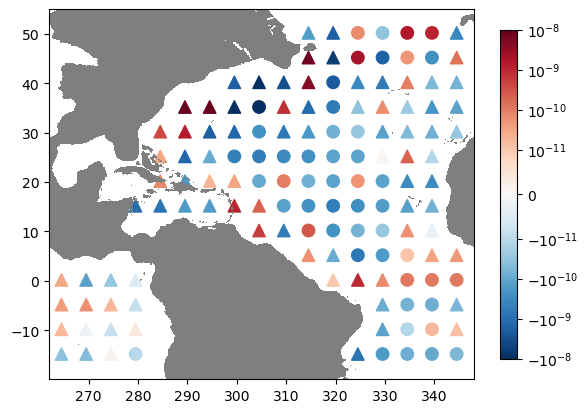

In [13]:
xx, yy = np.meshgrid(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(KEflux.isel(time=0,YC=slice(None,-1))
                       - hKEflux.isel(time=0,YC=slice(None,-1))
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=(KEflux_full.isel(time=0,YC=slice(None,-1))
              - hKEflux_full.isel(time=0,YC=slice(None,-1))
             ), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(KEflux.isel(time=0,YC=slice(None,-1))
                       - hKEflux.isel(time=0,YC=slice(None,-1))
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=(KEflux_full.isel(time=0,YC=slice(None,-1))
                  - hKEflux_full.isel(time=0,YC=slice(None,-1))
                 ), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/dKEflux_Z0452_s=%03dkm_%010d_xgcm.pdf' 
                    % (int(length*1e-3), ntimes[0,0])))

In [ ]:
xx, yy = np.meshgrid(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
im = ax.scatter(xx, yy, 
                s=80, marker='^',
                c=(KEflux.isel(YC=slice(None,-1)).mean('time'), cmap='RdBu_r',
                rasterized=True,
                norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
               )
ax.scatter(xx, yy, 
           s=80,
           c=KEflux_full.isel(YC=slice(None,-1)).mean('time'), cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)
cbar = fig.colorbar(im, ax=ax, shrink=.7)
# cbar.set_label(r"$\varepsilon_K$", fontsize=12)
plt.savefig(op.join(spec,'Figs/KEflux_Z0452_s=%03dkm_1967_xgcm.pdf' 
                    % (int(length*1e-3), ntimes[0,0])))

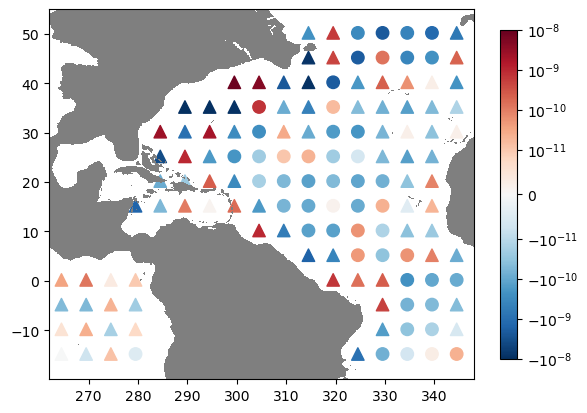

In [51]:
xx, yy = np.meshgrid(hKEflux.XC, hKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
im = ax.scatter(xx, yy, 
                s=80, marker='^',
                c=hKEflux.isel(time=0,YC=slice(None,-1)), cmap='RdBu_r',
                rasterized=True,
                norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
               )
ax.scatter(xx, yy, 
           s=80,
           c=hKEflux_full.isel(time=0,YC=slice(None,-1)), cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)
cbar = fig.colorbar(im, ax=ax, shrink=.7)
# cbar.set_label(r"$\varepsilon_K$", fontsize=12)
plt.savefig(op.join(spec,'Figs/hKEflux_Z0452_s=%03dkm_%010d_xgcm.pdf' 
                    % (int(length*1e-3), ntimes[0,0])))

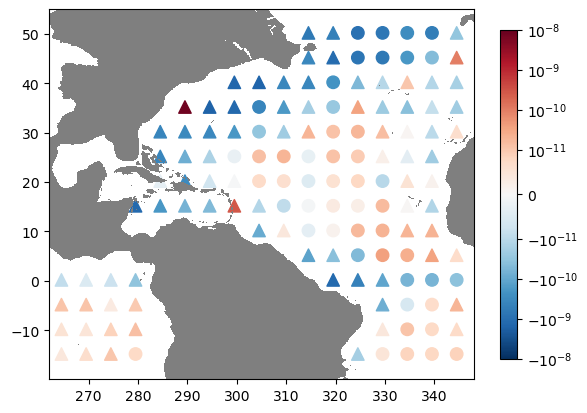

In [24]:
xx, yy = np.meshgrid(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(KEflux.isel(YC=slice(None,-1))
                       - hKEflux.isel(YC=slice(None,-1))
                      ).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=(KEflux_full.isel(YC=slice(None,-1))
              - hKEflux_full.isel(YC=slice(None,-1))
             ).mean('time'), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(KEflux.isel(YC=slice(None,-1))
                       - hKEflux.isel(YC=slice(None,-1))
                      ).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=(KEflux_full.isel(YC=slice(None,-1))
                  - hKEflux_full.isel(YC=slice(None,-1))
                 ).mean('time'), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/dKEflux_Z0452_s=%03dkm_1967_xgcm.pdf' 
                    % (int(length*1e-3))))

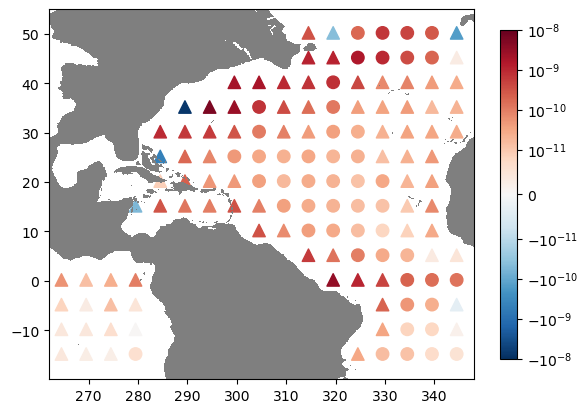

In [23]:
xx, yy = np.meshgrid(hKEflux.XC, hKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
im = ax.scatter(xx, yy, 
                s=80, marker='^',
                c=hKEflux.isel(YC=slice(None,-1)).mean('time'), 
                cmap='RdBu_r',
                rasterized=True,
                norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
               )
ax.scatter(xx, yy, 
           s=80,
           c=hKEflux_full.isel(YC=slice(None,-1)).mean('time'), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)
cbar = fig.colorbar(im, ax=ax, shrink=.7)
# cbar.set_label(r"$\varepsilon_K$", fontsize=12)
plt.savefig(op.join(spec,'Figs/hKEflux_Z0452_s=%03dkm_1967_xgcm.pdf' 
                    % (int(length*1e-3))))

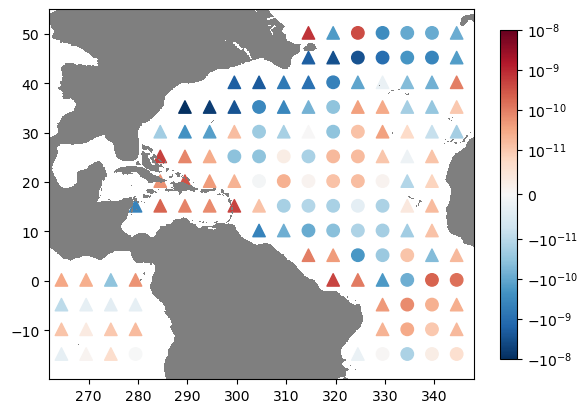

In [11]:
xx, yy = np.meshgrid(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=((KEflux.isel(YC=slice(None,-1))
                        - hKEflux.isel(YC=slice(None,-1))
                       ).isel(time=slice(None,6)).mean('time')
                       - (KEflux.isel(YC=slice(None,-1))
                          - hKEflux.isel(YC=slice(None,-1))
                         ).isel(time=slice(12,18)).mean('time')
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=((KEflux_full.isel(YC=slice(None,-1))
               - hKEflux_full.isel(YC=slice(None,-1))
              ).isel(time=slice(None,6)).mean('time')
              - (KEflux_full.isel(YC=slice(None,-1))
                 - hKEflux_full.isel(YC=slice(None,-1))
                ).isel(time=slice(12,18)).mean('time')
             ), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=((KEflux.isel(YC=slice(None,-1))
                        - hKEflux.isel(YC=slice(None,-1))
                       ).isel(time=slice(None,6)).mean('time')
                       - (KEflux.isel(YC=slice(None,-1))
                          - hKEflux.isel(YC=slice(None,-1))
                         ).isel(time=slice(12,18)).mean('time')
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=((KEflux_full.isel(YC=slice(None,-1))
                   - hKEflux_full.isel(YC=slice(None,-1))
                  ).isel(time=slice(None,6)).mean('time')
                  - (KEflux_full.isel(YC=slice(None,-1))
                     - hKEflux_full.isel(YC=slice(None,-1))
                    ).isel(time=slice(12,18)).mean('time')
                 ), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/vKEflux_Z0452_s=%03dkm_JFM-JAS1967_xgcm.pdf' 
                    % (int(length*1e-3))))

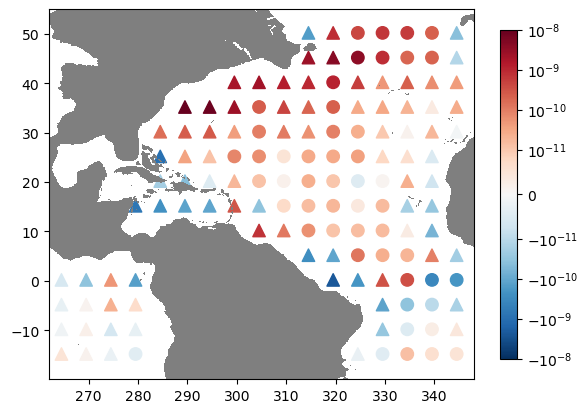

In [12]:
xx, yy = np.meshgrid(hKEflux.XC, hKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
im = ax.scatter(xx, yy, 
                s=80, marker='^',
                c=(hKEflux.isel(YC=slice(None,-1),
                                time=slice(None,6)).mean('time')
                   - hKEflux.isel(YC=slice(None,-1),
                                  time=slice(12,18)).mean('time')
                  ), 
                cmap='RdBu_r',
                rasterized=True,
                norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
               )
ax.scatter(xx, yy, 
           s=80,
           c=(hKEflux_full.isel(YC=slice(None,-1),
                               time=slice(None,6)).mean('time')
              - hKEflux_full.isel(YC=slice(None,-1),
                                  time=slice(12,18)).mean('time')
             ), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)
cbar = fig.colorbar(im, ax=ax, shrink=.7)
# cbar.set_label(r"$\varepsilon_K$", fontsize=12)
plt.savefig(op.join(spec,'Figs/hKEflux_Z0452_s=%03dkm_JFM-JAS1967_xgcm.pdf' 
                    % (int(length*1e-3))))

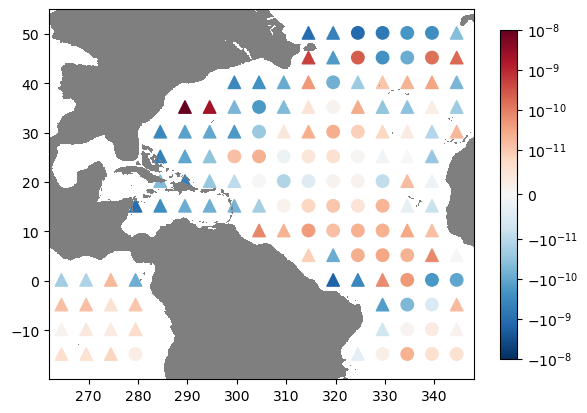

In [13]:
xx, yy = np.meshgrid(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(KEflux.isel(YC=slice(None,-1))
                       - hKEflux.isel(YC=slice(None,-1))
                      ).isel(time=slice(12,18)).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=(KEflux_full.isel(YC=slice(None,-1))
              - hKEflux_full.isel(YC=slice(None,-1))
             ).isel(time=slice(12,18)).mean('time'), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(KEflux.isel(YC=slice(None,-1))
                       - hKEflux.isel(YC=slice(None,-1))
                      ).isel(time=slice(12,18)).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=(KEflux_full.isel(YC=slice(None,-1))
                  - hKEflux_full.isel(YC=slice(None,-1))
                 ).isel(time=slice(12,18)).mean('time'), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/vKEflux_Z0452_s=%03dkm_JAS1967_xgcm.pdf' 
                    % (int(length*1e-3))))

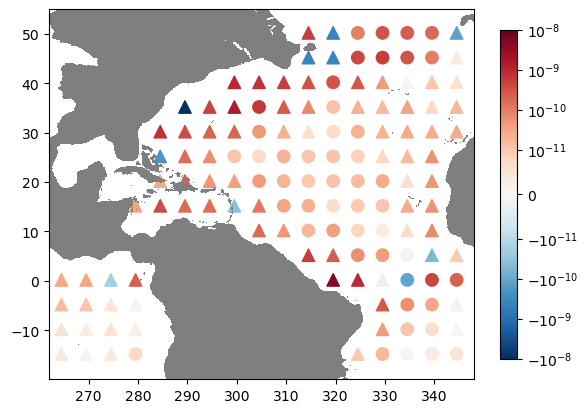

In [14]:
xx, yy = np.meshgrid(hKEflux.XC, hKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
im = ax.scatter(xx, yy, 
                s=80, marker='^',
                c=hKEflux.isel(YC=slice(None,-1),
                               time=slice(12,18)).mean('time'), 
                cmap='RdBu_r',
                rasterized=True,
                norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
               )
ax.scatter(xx, yy, 
           s=80,
           c=hKEflux_full.isel(YC=slice(None,-1),
                               time=slice(12,18)).mean('time'), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)
cbar = fig.colorbar(im, ax=ax, shrink=.7)
# cbar.set_label(r"$\varepsilon_K$", fontsize=12)
plt.savefig(op.join(spec,'Figs/hKEflux_Z0452_s=%03dkm_JAS1967_xgcm.pdf' 
                    % (int(length*1e-3))))

In [ ]:
ystart = ySstart
nmembs = np.arange(100,148)

yystart = 0
yys = yystart
dsm = open_mdsdataset(op.join(ddir,'ensm/run%4d/ocn/' 
                              % (years[yystart])), 
                      grid_dir=gdir,
                      prefix=['snap_diagOcn',], 
                      delta_t=2e2, iters=ntimes[0,0]                              
                     ).isel(time=0
                           ).chunk({'YC':ychunk,'YG':ychunk,
                                    'XC':xchunk,'XG':xchunk})
coords = {
        # "T": {"center": "time"},
        "X": {"center": "XC",     "left" : "XG"},
        "Y": {"center": "YC",     "left" : "YG"},
        "Z": {"center": "Z" ,     "outer": "Zp1", 
              "left"  : "Zl",     "right": "Zu"}
        }
grid = Grid(dsm, periodic=['X'],
            coords=coords)
EKEflux_full = xr.DataArray(np.ones((25,len(np.arange(ystart+5,yend+10,5)),
                               len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                              )), dims=['time','YC','XC'], 
                      coords={'time':range(25),
                              'YC':np.arange(ystart+5,yend+10,5),
                              'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                     ) * np.nan
EKEflux = xr.DataArray(np.ones((25,len(np.arange(ystart+5,yend+10,5)),
                               len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                              )), dims=['time','YC','XC'], 
                      coords={'time':range(25),
                              'YC':np.arange(ystart+5,yend+10,5),
                              'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                     ) * np.nan
length = 120e3

for year in years[yystart:yystart+1]:
    if year == years[yystart]:
        mtimes = ntimes[yys]
    else:
        mtimes = ntimes[yys]
    
    im = 0
    for itime in mtimes[::3]:       
        iy = 0
        for lat in np.arange(ystart,yend+5,5)[:-1]:
            mask = dsm.maskC.isel(Z=18).sel(YC=slice(lat,lat+10)
                                           ).reset_coords(drop=True)
            ix = 0
            for lon in np.arange(dsm.XC.min()-2.5,dsm.XC.max(),5):    
                xend = lon + 10
                if lon < dsm.XC.min():
                    dlon = dsm.XC.min() - lon
                    m = mask.sel(XC=slice(None,xend))
                    mm = mask.sel(XC=slice(dsm.XC.max()-dlon,None))
                    mmm = xr.concat([xr.DataArray(mm.data, dims=['YC','XC'],
                                          coords={'YC':m.YC,
                                                  'XC':np.linspace(lon,
                                                                   lon+dlon,
                                                                   num=len(mm.XC)+1,
                                                                   endpoint=False)[1:]}
                                                 ),
                                     m
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_Adv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_Adv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                       coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                           + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = (ds0_trans.U + ds0_trans.V)

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            EKEflux_full[dict(time=im,YC=iy,XC=ix)
                                       ] = piw.sel(scale=length, method='nearest'
                                                           )   
                        else:
                            EKEflux[dict(time=im,YC=iy,XC=ix)
                                  ] = piw.sel(scale=length, method='nearest'
                                                           )   
                elif xend > dsm.XC.max():
                    dlon = -dsm.XC.max() + xend
                    m = mask.sel(XC=slice(lon,None))
                    mm = mask.sel(XC=slice(None,dsm.XC.min()+dlon))
                    mmm = xr.concat([m,
                                     xr.DataArray(mm.data, dims=['YC','XC'],
                                          coords={'YC':m.YC,
                                                  'XC':np.linspace(dsm.XC.max(),
                                                                   dsm.XC.max()+dlon,
                                                                   num=len(mm.XC)+1,
                                                                   endpoint=False)[1:]}
                                                 )
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_Adv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_Adv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                       coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                           + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = (ds0_trans.U + ds0_trans.V)

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            EKEflux_full[dict(time=im,YC=iy,XC=ix)
                                       ] = piw.sel(scale=length, method='nearest'
                                                           )   
                        else:
                            EKEflux[dict(time=im,YC=iy,XC=ix)
                                  ] = piw.sel(scale=length, method='nearest'
                                                           )   
                else:
                    mmm = mask.sel(XC=slice(lon,xend))
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_Adv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_Adv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                               + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = (ds0_trans.U + ds0_trans.V)

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            EKEflux_full[dict(time=im,YC=iy,XC=ix)
                                       ] = piw.sel(scale=length, method='nearest'
                                                           )   
                        else:
                            EKEflux[dict(time=im,YC=iy,XC=ix)
                                  ] = piw.sel(scale=length, method='nearest'
                                                           )   
                
                ds0_trans.close()
                ix += 1
            iy += 1

        dsm.close()
        im += 1
        print(itime)
    yys += 1

# KEflux[dict(XC=0)] = KEflux.isel(XC=-1)
EKEflux

In [ ]:
ystart = ySstart
nmembs = np.arange(100,148)

yystart = 0
yys = yystart
dsm = open_mdsdataset(op.join(ddir,'ensm/run%4d/ocn/' 
                              % (years[yystart])), 
                      grid_dir=gdir,
                      prefix=['snap_diagOcn',], 
                      delta_t=2e2, iters=ntimes[0,0]                              
                     ).isel(time=0
                           ).chunk({'YC':ychunk,'YG':ychunk,
                                    'XC':xchunk,'XG':xchunk})
coords = {
        # "T": {"center": "time"},
        "X": {"center": "XC",     "left" : "XG"},
        "Y": {"center": "YC",     "left" : "YG"},
        "Z": {"center": "Z" ,     "outer": "Zp1", 
              "left"  : "Zl",     "right": "Zu"}
        }
grid = Grid(dsm, periodic=['X'],
            coords=coords)
hEKEflux_full = xr.DataArray(np.ones((25,len(np.arange(ystart+5,yend+10,5)),
                               len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                              )), dims=['time','YC','XC'], 
                      coords={'time':range(25),
                              'YC':np.arange(ystart+5,yend+10,5),
                              'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                     ) * np.nan
hEKEflux = xr.DataArray(np.ones((25,len(np.arange(ystart+5,yend+10,5)),
                               len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                              )), dims=['time','YC','XC'], 
                      coords={'time':range(25),
                              'YC':np.arange(ystart+5,yend+10,5),
                              'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                     ) * np.nan
# length = 400e3

for year in years[yystart:yystart+1]:
    if year == years[yystart]:
        mtimes = ntimes[yys]
    else:
        mtimes = ntimes[yys]
    
    im = 0
    for itime in mtimes[::3]:       
        iy = 0
        for lat in np.arange(ystart,yend+5,5)[:-1]:
            mask = dsm.maskC.isel(Z=18).sel(YC=slice(lat,lat+10)
                                           ).reset_coords(drop=True)
            ix = 0
            for lon in np.arange(dsm.XC.min()-2.5,dsm.XC.max(),5):    
                xend = lon + 10
                if lon < dsm.XC.min():
                    dlon = dsm.XC.min() - lon
                    m = mask.sel(XC=slice(None,xend))
                    mm = mask.sel(XC=slice(dsm.XC.max()-dlon,None))
                    mmm = xr.concat([xr.DataArray(mm.data, dims=['YC','XC'],
                                          coords={'YC':m.YC,
                                                  'XC':np.linspace(lon,
                                                                   lon+dlon,
                                                                   num=len(mm.XC)+1,
                                                                   endpoint=False)[1:]}
                                                 ),
                                     m
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_horiAdv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_horiAdv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                       coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                           + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = (ds0_trans.U + ds0_trans.V)

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            hEKEflux_full[dict(time=im,YC=iy,XC=ix)
                                       ] = piw.sel(scale=length, method='nearest'
                                                           )   
                        else:
                            hEKEflux[dict(time=im,YC=iy,XC=ix)
                                  ] = piw.sel(scale=length, method='nearest'
                                                           )   
                elif xend > dsm.XC.max():
                    dlon = -dsm.XC.max() + xend
                    m = mask.sel(XC=slice(lon,None))
                    mm = mask.sel(XC=slice(None,dsm.XC.min()+dlon))
                    mmm = xr.concat([m,
                                     xr.DataArray(mm.data, dims=['YC','XC'],
                                          coords={'YC':m.YC,
                                                  'XC':np.linspace(dsm.XC.max(),
                                                                   dsm.XC.max()+dlon,
                                                                   num=len(mm.XC)+1,
                                                                   endpoint=False)[1:]}
                                                 )
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_horiAdv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_horiAdv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                       coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                           + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = (ds0_trans.U + ds0_trans.V)

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            hEKEflux_full[dict(time=im,YC=iy,XC=ix)
                                       ] = piw.sel(scale=length, method='nearest'
                                                           )   
                        else:
                            hEKEflux[dict(time=im,YC=iy,XC=ix)
                                  ] = piw.sel(scale=length, method='nearest'
                                                           )   
                else:
                    mmm = mask.sel(XC=slice(lon,xend))
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_horiAdv/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname0 = (
                            'Z0452/MOM/Snap/%010d/Wavelet/Eddy-eddy_horiAdv/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds0_trans = xr.open_zarr(op.join(spec,fname0))
                        dks = xr.DataArray(np.abs(np.diff(ds0_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds0_trans.scale[1:].data 
                                                               + ds0_trans.scale[:-1].data)}
                                          ).interp(scale=ds0_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = (ds0_trans.U + ds0_trans.V)

                        piw = ((Ak * dks
                               ).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds0_trans.angle)[0]*2
                              ).mean('nmemb')
                        if crit == 1.:
                            hEKEflux_full[dict(time=im,YC=iy,XC=ix)
                                       ] = piw.sel(scale=length, method='nearest'
                                                           )   
                        else:
                            hEKEflux[dict(time=im,YC=iy,XC=ix)
                                  ] = piw.sel(scale=length, method='nearest'
                                                           )   
                
                ds0_trans.close()
                ix += 1
            iy += 1

        dsm.close()
        im += 1
        print(itime)
    yys += 1

# KEflux[dict(XC=0)] = KEflux.isel(XC=-1)
hEKEflux

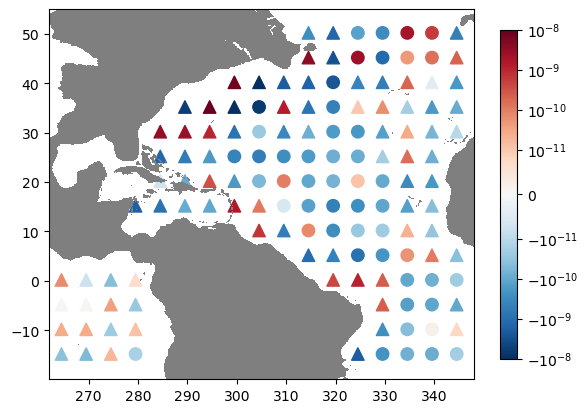

In [13]:
xx, yy = np.meshgrid(EKEflux.XC, EKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(KEflux.isel(time=0,YC=slice(None,-1))
                       - EKEflux.isel(time=0,YC=slice(None,-1))
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=(KEflux_full.isel(time=0,YC=slice(None,-1))
              - EKEflux_full.isel(time=0,YC=slice(None,-1))
             ), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(KEflux.isel(time=0,YC=slice(None,-1))
                       - EKEflux.isel(time=0,YC=slice(None,-1))
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=(KEflux_full.isel(time=0,YC=slice(None,-1))
                  - EKEflux_full.isel(time=0,YC=slice(None,-1))
                 ), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/mEKEflux_Z0452_s=%03dkm_%010d_xgcm.pdf' 
                    % (int(length*1e-3), ntimes[0,0]))
           )

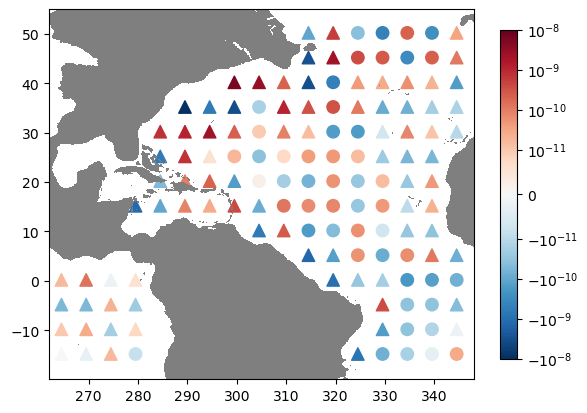

In [54]:
xx, yy = np.meshgrid(EKEflux.XC, EKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(hKEflux.isel(time=0,YC=slice(None,-1))
                       - hEKEflux.isel(time=0,YC=slice(None,-1))
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=(hKEflux_full.isel(time=0,YC=slice(None,-1))
              - hEKEflux_full.isel(time=0,YC=slice(None,-1))
             ), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(hKEflux.isel(time=0,YC=slice(None,-1))
                       - hEKEflux.isel(time=0,YC=slice(None,-1))
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=(hKEflux_full.isel(time=0,YC=slice(None,-1))
                  - hEKEflux_full.isel(time=0,YC=slice(None,-1))
                 ), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/dhEKEflux_Z0452_s=%03dkm_%010d_xgcm.pdf' 
                    % (int(length*1e-3), ntimes[0,0]))
           )

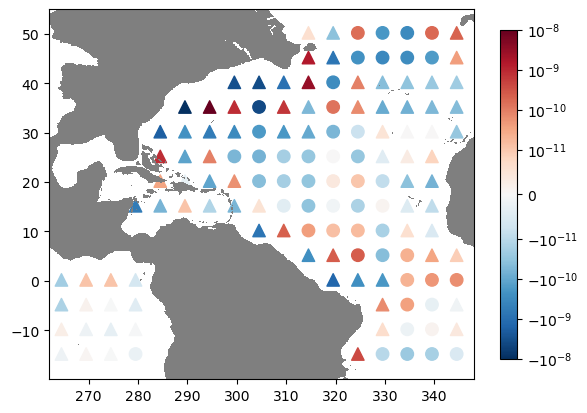

In [55]:
xx, yy = np.meshgrid(EKEflux.XC, EKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(EKEflux.isel(time=0,YC=slice(None,-1))
                       - hEKEflux.isel(time=0,YC=slice(None,-1))
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=(EKEflux_full.isel(time=0,YC=slice(None,-1))
              - hEKEflux_full.isel(time=0,YC=slice(None,-1))
             ), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(EKEflux.isel(time=0,YC=slice(None,-1))
                       - hEKEflux.isel(time=0,YC=slice(None,-1))
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=(EKEflux_full.isel(time=0,YC=slice(None,-1))
                  - hEKEflux_full.isel(time=0,YC=slice(None,-1))
                 ), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/vEKEflux_Z0452_s=%03dkm_%010d_xgcm.pdf' 
                    % (int(length*1e-3), ntimes[0,0]))
           )

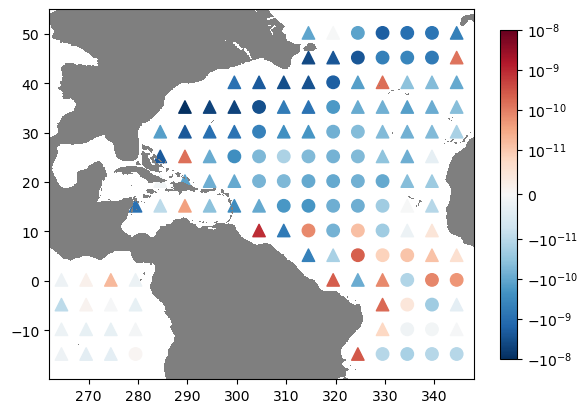

In [38]:
xx, yy = np.meshgrid(EKEflux.XC, EKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(EKEflux.isel(time=0,YC=slice(None,-1))
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=(EKEflux_full.isel(time=0,YC=slice(None,-1))
             ), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(EKEflux.isel(time=0,YC=slice(None,-1))
                      ), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=(EKEflux_full.isel(time=0,YC=slice(None,-1))
                 ), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/EKEflux_Z0452_s=%03dkm_%010d_xgcm.pdf' 
                    % (int(length*1e-3), ntimes[0,0]))
           )

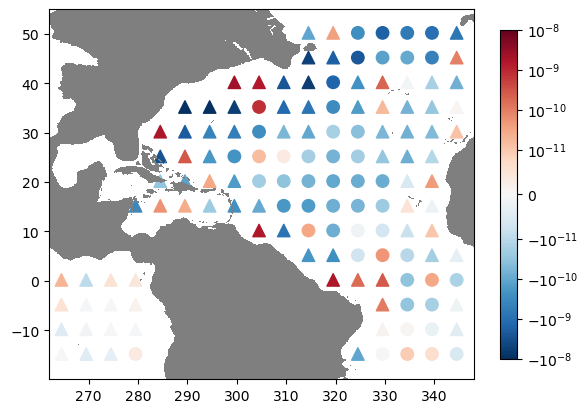

In [39]:
xx, yy = np.meshgrid(hEKEflux.XC, hEKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
im = ax.scatter(xx, yy, 
                s=80, marker='^',
                c=hEKEflux.isel(time=0,YC=slice(None,-1)), 
                cmap='RdBu_r',
                rasterized=True,
                norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
               )
ax.scatter(xx, yy, 
           s=80,
           c=hEKEflux_full.isel(time=0,YC=slice(None,-1)), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)
cbar = fig.colorbar(im, ax=ax, shrink=.7)
# cbar.set_label(r"$\varepsilon_K$", fontsize=12)
plt.savefig(op.join(spec,'Figs/hEKEflux_Z0452_s=%03dkm_%010d_xgcm.pdf' 
                    % (int(length*1e-3), ntimes[0,0]))
           )

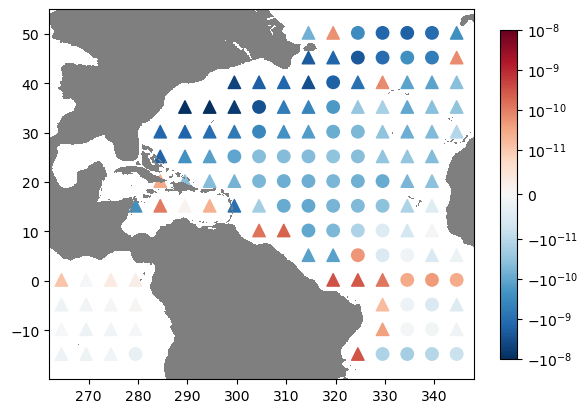

In [29]:
xx, yy = np.meshgrid(EKEflux.XC, EKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(EKEflux.isel(YC=slice(None,-1))
                      ).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=(EKEflux_full.isel(YC=slice(None,-1))
             ).mean('time'), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(EKEflux.isel(YC=slice(None,-1))
                      ).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=(EKEflux_full.isel(YC=slice(None,-1))
                 ).mean('time'), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/EKEflux_Z0452_s=%03dkm_1967_xgcm.pdf' 
                    % (int(length*1e-3)))
           )

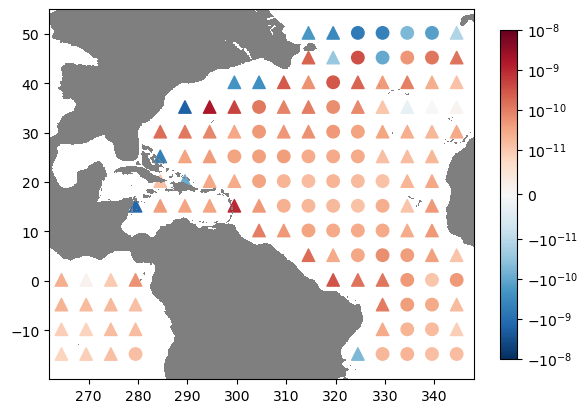

In [23]:
xx, yy = np.meshgrid(EKEflux.XC, EKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(KEflux.isel(YC=slice(None,-1))
                       - EKEflux.isel(YC=slice(None,-1))
                      ).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=(KEflux_full.isel(YC=slice(None,-1))
              - EKEflux_full.isel(YC=slice(None,-1))
             ).mean('time'), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(KEflux.isel(YC=slice(None,-1))
                       - EKEflux.isel(YC=slice(None,-1))
                      ).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=(KEflux_full.isel(YC=slice(None,-1))
                  - EKEflux_full.isel(YC=slice(None,-1))
                 ).mean('time'), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/mEKEflux_Z0452_s=%03dkm_1967_xgcm.pdf' 
                    % (int(length*1e-3)))
           )

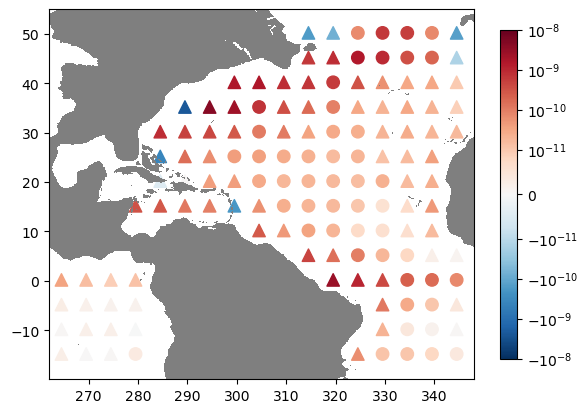

In [24]:
xx, yy = np.meshgrid(hEKEflux.XC, hEKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
im = ax.scatter(xx, yy, 
                s=80, marker='^',
                c=hEKEflux.isel(YC=slice(None,-1)).mean('time'), 
                cmap='RdBu_r',
                rasterized=True,
                norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
               )
ax.scatter(xx, yy, 
           s=80,
           c=hEKEflux_full.isel(YC=slice(None,-1)).mean('time'), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)
cbar = fig.colorbar(im, ax=ax, shrink=.7)
# cbar.set_label(r"$\varepsilon_K$", fontsize=12)
plt.savefig(op.join(spec,'Figs/hEKEflux_Z0452_s=%03dkm_1967_xgcm.pdf' 
                    % (int(length*1e-3)))
           )

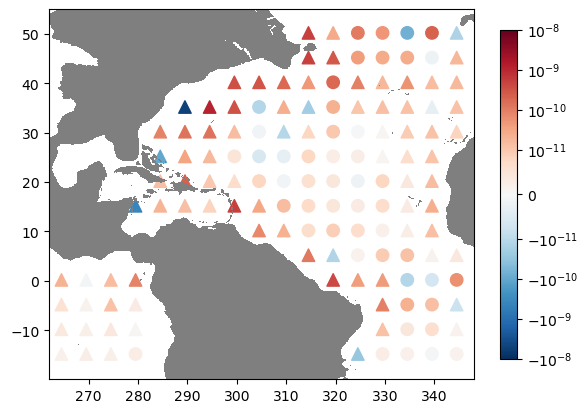

In [25]:
xx, yy = np.meshgrid(EKEflux.XC, EKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(hKEflux.isel(YC=slice(None,-1))
                       - hEKEflux.isel(YC=slice(None,-1))
                      ).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=(hKEflux_full.isel(YC=slice(None,-1))
              - hEKEflux_full.isel(YC=slice(None,-1))
             ).mean('time'), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(hKEflux.isel(YC=slice(None,-1))
                       - hEKEflux.isel(YC=slice(None,-1))
                      ).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=(hKEflux_full.isel(YC=slice(None,-1))
                  - hEKEflux_full.isel(YC=slice(None,-1))
                 ).mean('time'), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/mhEKEflux_Z0452_s=%03dkm_1967_xgcm.pdf' 
                    % (int(length*1e-3)))
           )

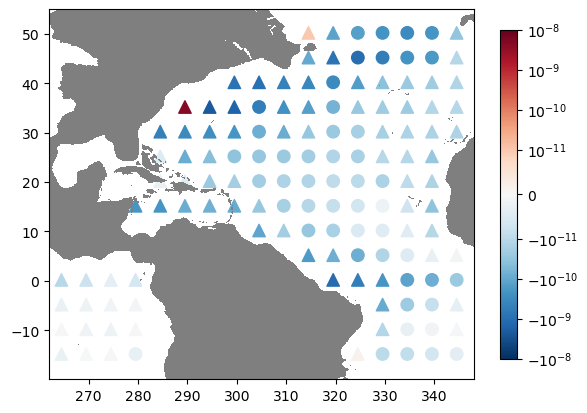

In [26]:
xx, yy = np.meshgrid(EKEflux.XC, EKEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
if length == 120e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(EKEflux.isel(YC=slice(None,-1))
                       - hEKEflux.isel(YC=slice(None,-1))
                      ).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
           s=80,
           c=(EKEflux_full.isel(YC=slice(None,-1))
              - hEKEflux_full.isel(YC=slice(None,-1))
             ).mean('time'), 
           cmap='RdBu_r',
           rasterized=True,
           norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
          )
elif length == 400e3:
    im = ax.scatter(xx, yy, 
                    s=80, marker='^',
                    c=(EKEflux.isel(YC=slice(None,-1))
                       - hEKEflux.isel(YC=slice(None,-1))
                      ).mean('time'), 
                    cmap='RdBu_r',
                    rasterized=True,
                    norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
                   )
    ax.scatter(xx, yy, 
               s=80,
               c=(EKEflux_full.isel(YC=slice(None,-1))
                  - hEKEflux_full.isel(YC=slice(None,-1))
                 ).mean('time'), 
               cmap='RdBu_r',
               rasterized=True,
               norm=clr.SymLogNorm(linthresh=1e-11, vmin=-1e-8, vmax=1e-8)
              )
    
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)

fig.subplots_adjust(right=.76)
# cbax0 = fig.add_axes([0.78, 0.25, 0.012, 0.5])
# cbar0 = fig.colorbar(im0, orientation='vertical', cax=cbax0)
# cbax1 = fig.add_axes([0.88, 0.25, 0.012, 0.5])
# cbar1 = fig.colorbar(im1, orientation='vertical', cax=cbax1)
# cbar1.set_label(r"$\frac{\varepsilon_K - \varepsilon_h}{\varepsilon_h}$", 
#                fontsize=15)
cbar = fig.colorbar(im, ax=ax, shrink=.7)

plt.savefig(op.join(spec,'Figs/vEKEflux_Z0452_s=%03dkm_1967_xgcm.pdf' 
                    % (int(length*1e-3)))
           )